# Финальный проект "Мобильное приложение "Ненужные вещи"

## Описание проекта
Мы работаем в команде сервиса "Ненужные вещи" - приложения для продажи ненужных вещей. Девиз компании "Ненужные вещи" — ваши ненужные вещи нужны кому-то еще! В этом проекте нам нужно выбрать метод сегментации пользователей, разделить пользователей на сегменты в зависимости от их поведения, выбрать целевой сегмент пользователей, для которого затем будет улучшено приложение. Также в ходе проекта мы проверим две гипотезы, чтобы протестировать поведение пользователей, пришедших из разных источников рекламы, и предоставим рекомендации по улучшению продукта.

## Описание данных
Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.
В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.
Датасет mobile_dataset.csv содержит колонки:
- event.time  — время совершения
- event.name  — название события
- user.id  — идентификатор пользователя

Датасет mobile_sources.csv содержит колонки:
- userId  — идентификатор пользователя
- source  — источник, с которого пользователь установил приложение

## Декомпозиция проекта:
1. Загрузка данных
2. Предобработка данных
 - Проверка сколько пропусков есть в наших таблицах;
 - Проверка сколько явных дубликатов есть в наших таблицах;
 - Проверка сколько неявных дубликатов есть в наших таблицах;
3. Исследовательский анализ данных
 - Проверка за какое время есть данные в наших таблицах;
 - Какие события есть в таблице mobile_dataset и как часто они встречаются;
 - Сколько уникальных пользователей есть в наших таблицах; 
 - Посмотрим сколько событий происходило за каждый день;
 - Посчитаем сколько в среднем событий приходится на одного пользователя;
4. Выделение групп пользователей
 - Расчет Retention rate;
 - Расчет времени, проведенного пользователями в приложении;
 - Расчет частоты действий;
 - Расчет конверсии в целевое действие - просмотр контактов;
5. Сегментация пользователей
 - На основании пункта 4 выделение критерия для сегментации (например, решаем, что сегментировать пользователей будем по времени , проведенному в приложении);
 - Расчет Retention rate для каждого сегмента;
 - Расчет конверсии в целевое действие - просмотр контактов для каждого сегмента;
 - Определение целевого сегмента пользователей, на который надо делать ставку при работе над приложением.
6. Проверка статистических гипотез
 - Гипотеза о том, что пользователи из разных источников показывают разную конверсию в целевое действие;
 - Собственная гипотеза;
7. Подведение итогов и общий вывод по проекту.

## Собственная гипотеза: пользователи, пришедшие из Yandex проводят больше времени в приложении чем пользователи из Google.
H0: Среднее время, которое пользователи из Yandex проводят в приложении равно среднему времени, которое пользователи из Google проводят в приложении.
H1: Среднее время, которое пользователи из Yandex проводят в приложении статистически значимо больше среднего времени, которое пользователи из Google проводят в приложении.
Предполагаемый порядок действий:
1. Для каждого пользователя посчитать сколько он в среднем времени проводит в приложении.
2. Добавить из таблицы mobile_sources источник из которого пришел пользователь.
3. Составить список из значений со временем использования приложения для пользователей из Yandex.
4. Составить список из значений со временем использования приложения для пользователей из Google.
5. Сравнить полученные списки с помощью критерия Стьюдента.

## 1. Загрузка данных

In [1]:
# Importing the libraries that we will need in this project
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import math as mth
from scipy import stats as st
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from datetime import datetime, timedelta
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 400

In [2]:
# Считаем данные из csv-файла в датафрейми , сохраним в переменную, изучим общую информацию о таблице
try:
    data = pd.read_csv('mobile_dataset.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
data.head(10)

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
6,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
9,2019-10-07 00:01:54.958298,advert_open,020292ab-89bc-4156-9acf-68bc2783f894


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
# Считаем данные из csv-файла в датафрейми , сохраним в переменную, изучим общую информацию о таблице
try:
    source = pd.read_csv('mobile_sources.csv')
except:
    source = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')

In [6]:
source.head(10)

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
5,17f6b2db-2964-4d11-89d8-7e38d2cb4750,yandex
6,62aa104f-592d-4ccb-8226-2ba0e719ded5,yandex
7,57321726-5d66-4d51-84f4-c797c35dcf2b,google
8,c2cf55c0-95f7-4269-896c-931d14deaab5,google
9,48e614d6-fe03-40f7-bf9e-4c4f61c19f64,yandex


In [7]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


### Вывод: на данном этапе мы открыли датасет изучили общую информацию об исходных данных

## 2. Предобработка данных

**Начнем с таблицы data**

In [8]:
# Переименуем названия столбцов в таблице
data = data.rename(columns = {'event.time': 'event_time', 'event.name': 'event_name', 'user.id': 'user_id'})

#### Проверим сколько пропусков есть в нашей таблице

In [9]:
data.isna().sum()

event_time    0
event_name    0
user_id       0
dtype: int64

**Вывод: пропусков не обнаружено.**

#### Проверим сколько неявных дубликатов есть в нашей таблице

In [10]:
data.duplicated().sum()

0

**Вывод: явных дубликатов не обнаружено.**

#### Проверим сколько неявных дубликатов есть в нашей таблице

In [11]:
# Произведем проверку на неявные дубликаты в столбце event_name
data['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

In [12]:
# Заменим название события show_contacts на contacts_show
data = data.replace({'event_name' : { 'show_contacts' : 'contacts_show'}})

In [13]:
data['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

**Вывод: заменили неявные дубликаты в столбце event_name.**

In [14]:
# Добавим столбец с датой
data['event_time'] = pd.to_datetime(data['event_time'])
data['date'] = pd.to_datetime(data['event_time']).dt.date

In [15]:
data.head(10)

,event_time,event_name,user_id,date
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
6,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
8,2019-10-07 00:01:49.732803,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
9,2019-10-07 00:01:54.958298,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07


**Проделаем аналогичные шаги с таблицей source**

In [16]:
# Переименуем названия столбцов в таблице
source = source.rename(columns = {'userId': 'user_id'})

#### Проверим сколько пропусков есть в нашей таблице

In [17]:
source.isna().sum()

user_id    0
source     0
dtype: int64

**Вывод: пропусков не обнаружено.**

#### Проверим сколько явных дубликатов есть в нашей таблице

In [18]:
source.duplicated().sum()

0

**Вывод: явных дубликатов не обнаружено.**

#### Проверим сколько неявных дубликатов есть в нашей таблице

In [19]:
source['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

**Вывод: неявных дубликатов не обнаружено, все значения соответствуют заданию.**

### Вывод: на данном этапе мы проверили наличие пропусков в таблицах, проверили данные на наличие дубликатов. Явных дубликатов и пропусков обнаружено не было. Были обнаружены и исправлены неявные дубликаты в столбце event_name таблицы data.

## 3. Исследовательский анализ данных

##### Проверим за какое время есть данные в наших таблицах

In [20]:
data['date'].unique()

array([datetime.date(2019, 10, 7), datetime.date(2019, 10, 8),
       datetime.date(2019, 10, 9), datetime.date(2019, 10, 10),
       datetime.date(2019, 10, 11), datetime.date(2019, 10, 12),
       datetime.date(2019, 10, 13), datetime.date(2019, 10, 14),
       datetime.date(2019, 10, 15), datetime.date(2019, 10, 16),
       datetime.date(2019, 10, 17), datetime.date(2019, 10, 18),
       datetime.date(2019, 10, 19), datetime.date(2019, 10, 20),
       datetime.date(2019, 10, 21), datetime.date(2019, 10, 22),
       datetime.date(2019, 10, 23), datetime.date(2019, 10, 24),
       datetime.date(2019, 10, 25), datetime.date(2019, 10, 26),
       datetime.date(2019, 10, 27), datetime.date(2019, 10, 28),
       datetime.date(2019, 10, 29), datetime.date(2019, 10, 30),
       datetime.date(2019, 10, 31), datetime.date(2019, 11, 1),
       datetime.date(2019, 11, 2), datetime.date(2019, 11, 3)],
      dtype=object)

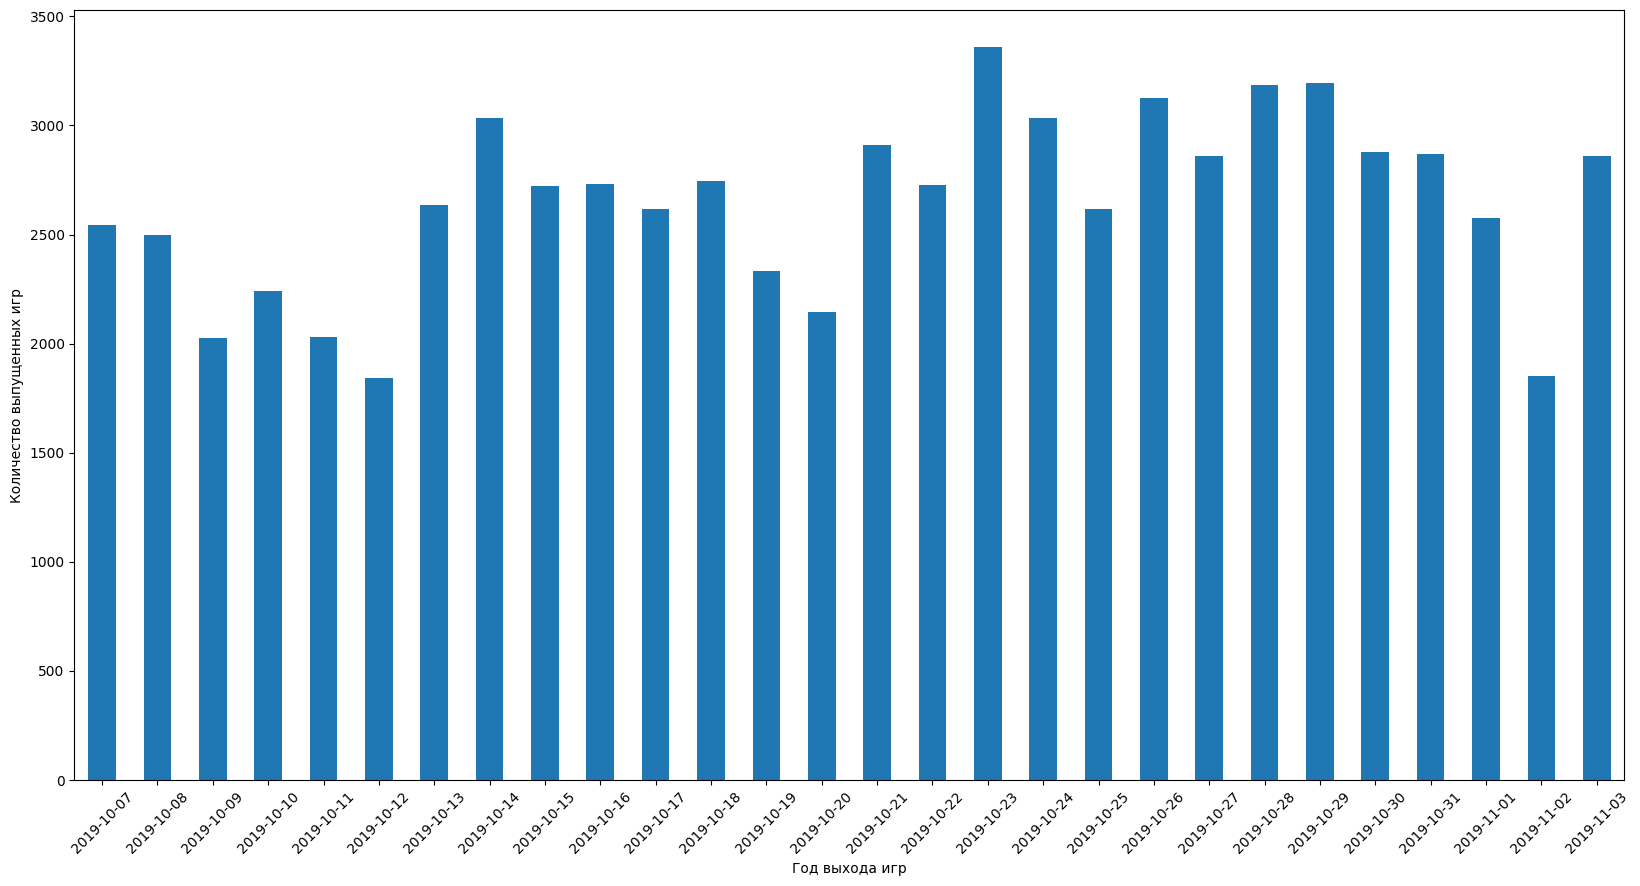

In [21]:
# Для лучшей наглядности построим столбчатую диаграмму
ax = data.pivot_table(index='date', values='event_name', aggfunc='count').plot(grid=False, kind='bar', 
                                                                               legend = None, 
                                                                               figsize=(20, 10))
plt.xlabel("Год выхода игр")
plt.ylabel("Количество выпущенных игр")
plt.xticks(rotation='45')
plt.show()

**Вывод: в таблице представлены данные с 7 октября по 3 ноября 2019 года, ни один день не пропущен.**

##### Проверим какие события есть в датасете и как часто они случаются

In [22]:
events = data.pivot_table(index='event_name', values='user_id', aggfunc='count').reset_index()
events

,event_name,user_id
0,advert_open,6164
1,contacts_call,541
2,contacts_show,4529
3,favorites_add,1417
4,map,3881
5,photos_show,10012
6,search_1,3506
7,search_2,324
8,search_3,522
9,search_4,701


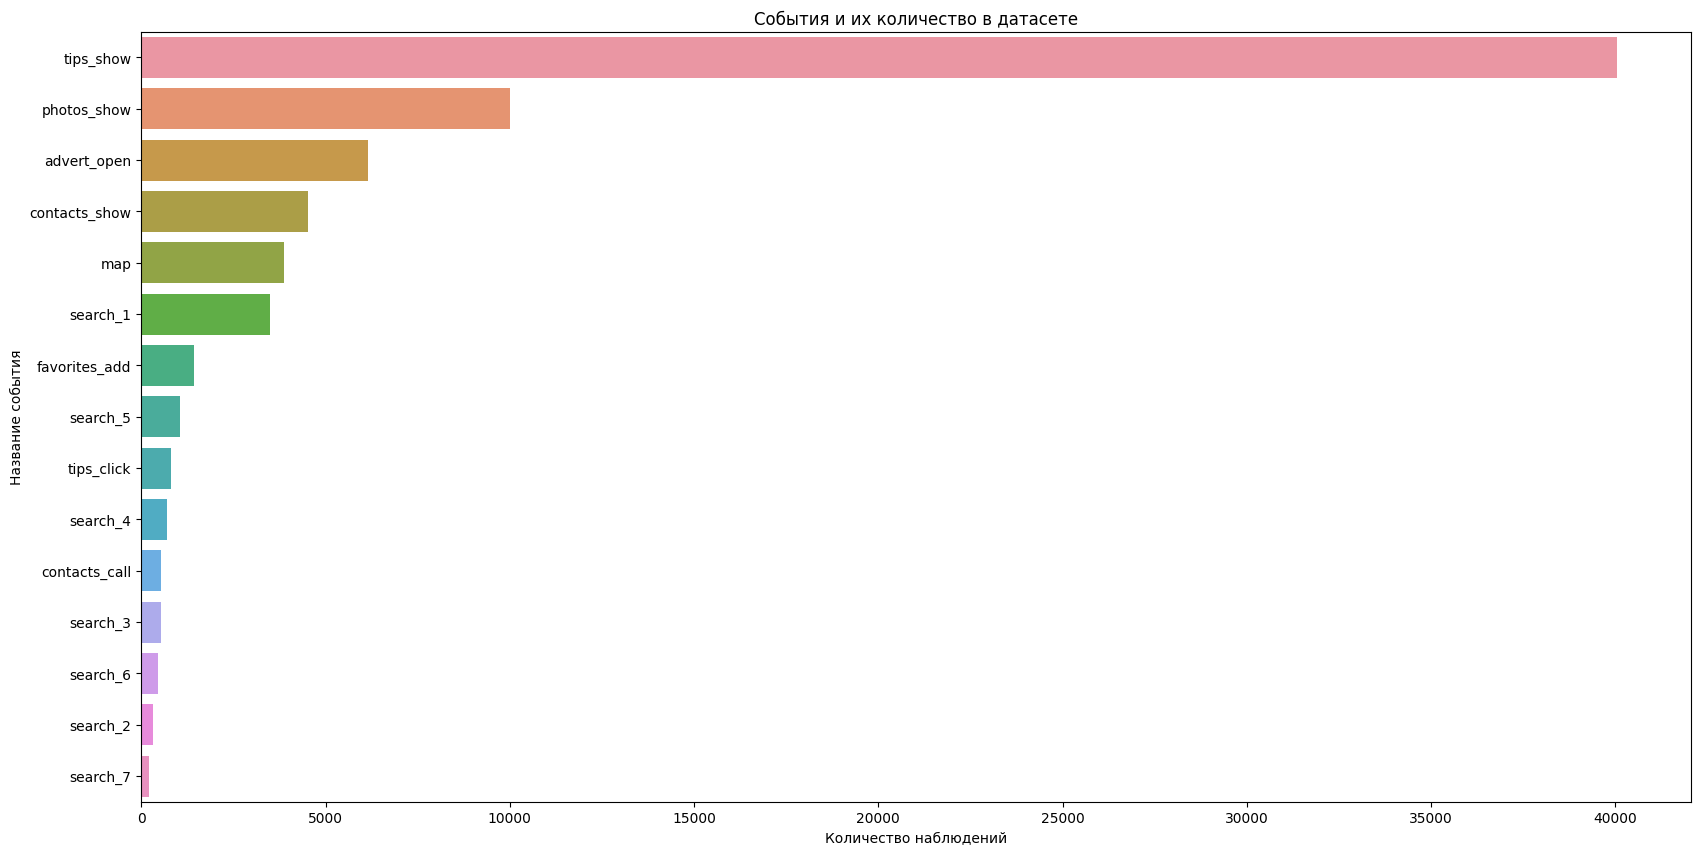

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x="user_id", y="event_name", data=events.sort_values(by='user_id', ascending=False))
plt.xlabel('Количество наблюдений')
plt.ylabel('Название события')
plt.title('События и их количество в датасете')
plt.show();

**Вывод: чаще всего встречается событие tips_show, событие search_7 встречается реже всех.**

##### Проверим сколько уникальных пользователей есть в датасете

In [24]:
data['user_id'].nunique()

4293

**Вывод: в таблице представлено 4 293 уникальных пользователей.** 

##### Проверим сколько событий происходило каждый день

In [25]:
events_per_date = data.pivot_table(index='date', values='event_name', aggfunc='count').reset_index()
events_per_date

,date,event_name
0,2019-10-07,2545
1,2019-10-08,2499
2,2019-10-09,2027
3,2019-10-10,2243
4,2019-10-11,2030
5,2019-10-12,1843
6,2019-10-13,2635
7,2019-10-14,3034
8,2019-10-15,2722
9,2019-10-16,2730


In [26]:
events_per_date['event_name'].mean()

2649.8928571428573

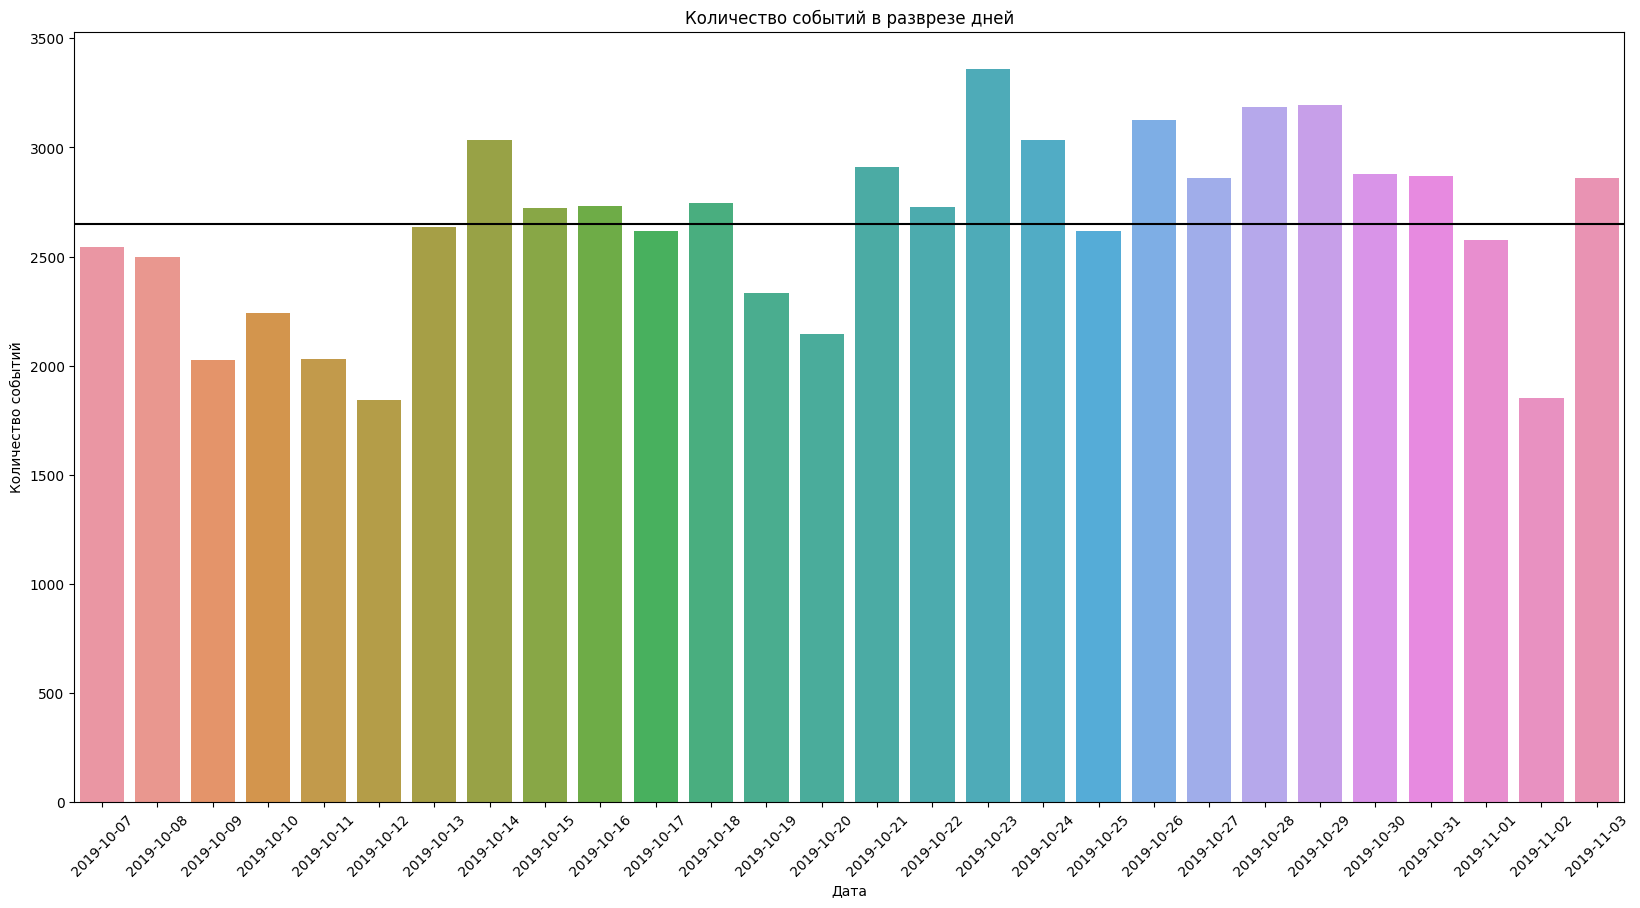

In [27]:
# Для лучшей наглядности построим столбчатую диаграмму
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x="date", y="event_name", data=events_per_date)
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Количество событий в разврезе дней')
plt.xticks(rotation='45')
plt.axhline(y=events_per_date['event_name'].mean(), color='black', linestyle='-')
plt.show();

**Вывод: в среднем в день происходило 2 650 событий, больше всего событий произошло 23.10.2019, меньше всего 12.10.2019. Также можно заметить, что количество событий снижается в выходные дни.** 

##### Посчитаем сколько в среднем событий приходится на пользователя

In [28]:
round(data['event_name'].count() / data['user_id'].nunique(), 2)

17.28

**Вывод: в среднем на одного пользователя приходится 17 событий.** 

### Вывод: мы изучили данные. Нам удалось установить следующее:
1. в таблице представлены данные с 7 октября по 3 ноября 2019 года
2. чаще всего встречается событие tips_show, событие search_7 встречается реже всех.
3. в таблице представлено 4 293 уникальных пользователей.
4. в среднем в день происходило 2 650 событий, больше всего событий произошло 23.10.2019, меньше всего 12.10.2019. Также можно заметить, что количество событий снижается в выходные дни.
5. в среднем на одного пользователя приходится 17 событий.

## 4. Выделение групп пользователей

##### Сначала выделим пользовательские сессии
Будем считать, что если между событиями прошло больше 30 минут, то они должны попасть в разные сессии.

In [29]:
# Отсортируем таблицу по user_id и event_time, 
# Так как алгоритм разделения базируется на расчете времени между соседними событиями
data = data.sort_values(['user_id', 'event_time'])

In [30]:
# Выделяем сессии
g = (data.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
data['session_id'] = data.groupby(['user_id', g], sort=False).ngroup() + 1

In [31]:
# Проверяем, что выделение прошло корректно на основе пользователя с большим количеством событий
check = data.query('user_id == "9ce63488-758a-481a-bcb5-a02b467e1d84"').sort_values(by='event_time', ascending=True)
check.head(10)

,event_time,event_name,user_id,date,session_id
2850,2019-10-08 10:47:17.140683,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,2019-10-08,6233
2862,2019-10-08 10:50:48.172317,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,2019-10-08,6233
2875,2019-10-08 10:54:05.351785,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,2019-10-08,6233
2881,2019-10-08 10:55:41.575921,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,2019-10-08,6233
2889,2019-10-08 11:00:44.591409,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,2019-10-08,6233
2890,2019-10-08 11:01:34.040393,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,2019-10-08,6233
2891,2019-10-08 11:03:49.847188,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,2019-10-08,6233
2893,2019-10-08 11:04:56.551146,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,2019-10-08,6233
2895,2019-10-08 11:07:22.464856,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,2019-10-08,6233
2896,2019-10-08 11:08:15.148809,tips_show,9ce63488-758a-481a-bcb5-a02b467e1d84,2019-10-08,6233


**Вывод: разбиение на сессии работает корректно.**

##### Рассчитаем Retention rate

**Создадим профили пользователей, для каждого пользователя найдем первую дату посещения приложения.**

In [32]:
profiles = data.sort_values(by=['user_id','event_time']).\
groupby('user_id').agg({'event_time': 'first'}).\
rename(columns={'event_time': 'first_ts'}).reset_index()

In [33]:
profiles['dt'] = pd.to_datetime(profiles['first_ts']).dt.date
profiles.head()

,user_id,first_ts,dt
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,2019-10-19
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35.385028,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05.555052,2019-10-18
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41.263364,2019-10-25


**Создадим таблицу сессий, для каждой сессии найдем время ее начала.**

In [34]:
sessions = data.pivot_table(index=['user_id', 'session_id'], values='event_time', aggfunc='min').reset_index()
sessions.head()

,user_id,session_id,event_time
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45.989359
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:33:55.577963
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:52:30.778932
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:18:14.635436
4,00157779-810c-4498-9e05-a1e9e3cedf93,5,2019-10-19 21:34:33.849769


In [35]:
sessions = sessions.rename(columns = {'event_time': 'session_start'})
sessions.head()

,user_id,session_id,session_start
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,1,2019-10-07 13:39:45.989359
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2,2019-10-09 18:33:55.577963
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,3,2019-10-21 19:52:30.778932
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,2019-10-22 11:18:14.635436
4,00157779-810c-4498-9e05-a1e9e3cedf93,5,2019-10-19 21:34:33.849769


In [36]:
# Объединим таблицу сессий и профили пользователей
retention_raw = profiles.merge(sessions, on='user_id', how='left')

In [37]:
retention_raw.head()

,user_id,first_ts,dt,session_id,session_start
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,1,2019-10-07 13:39:45.989359
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,2,2019-10-09 18:33:55.577963
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,3,2019-10-21 19:52:30.778932
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,4,2019-10-22 11:18:14.635436
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,2019-10-19,5,2019-10-19 21:34:33.849769


In [38]:
# Вычисляем лайфтайм для каждой сессии в днях
retention_raw['lifetime'] = (retention_raw['session_start'] - retention_raw['first_ts']).dt.days
retention_raw['dt'] = pd.to_datetime(retention_raw['first_ts']).dt.date
retention_raw.head()

,user_id,first_ts,dt,session_id,session_start,lifetime
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,1,2019-10-07 13:39:45.989359,0
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,2,2019-10-09 18:33:55.577963,2
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,3,2019-10-21 19:52:30.778932,14
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,2019-10-07,4,2019-10-22 11:18:14.635436,14
4,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,2019-10-19,5,2019-10-19 21:34:33.849769,0


In [39]:
# Строим таблицу удержания
retention = retention_raw.pivot_table(index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique')
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,204.0,24.0,19.0,22.0,11.0,7.0,12.0,16.0,11.0,10.0,10.0,7.0,5.0,12.0,10.0,10.0,10.0,3.0,9.0,4.0,3.0,4.0,7.0,7.0,8.0,9.0,6.0
2019-10-08,167.0,27.0,21.0,9.0,7.0,11.0,9.0,12.0,9.0,6.0,10.0,4.0,5.0,5.0,6.0,7.0,5.0,5.0,3.0,7.0,5.0,3.0,4.0,7.0,4.0,4.0,2.0
2019-10-09,176.0,13.0,11.0,10.0,12.0,12.0,10.0,13.0,10.0,6.0,4.0,5.0,6.0,10.0,5.0,5.0,2.0,3.0,2.0,5.0,2.0,6.0,2.0,1.0,4.0,3.0,NaN
2019-10-10,174.0,15.0,18.0,14.0,16.0,14.0,12.0,9.0,14.0,6.0,6.0,9.0,8.0,7.0,6.0,5.0,9.0,10.0,6.0,5.0,3.0,7.0,3.0,2.0,2.0,NaN,NaN
2019-10-11,136.0,12.0,16.0,13.0,12.0,10.0,9.0,6.0,2.0,6.0,5.0,5.0,7.0,4.0,6.0,2.0,9.0,8.0,4.0,3.0,3.0,4.0,4.0,2.0,NaN,NaN,NaN
2019-10-12,125.0,15.0,20.0,7.0,8.0,11.0,10.0,11.0,10.0,8.0,8.0,5.0,9.0,6.0,7.0,6.0,4.0,5.0,5.0,3.0,3.0,8.0,4.0,NaN,NaN,NaN,NaN
2019-10-13,148.0,19.0,10.0,8.0,10.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,7.0,7.0,9.0,1.0,1.0,2.0,3.0,2.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-10-14,185.0,21.0,19.0,19.0,15.0,13.0,9.0,8.0,14.0,7.0,7.0,9.0,3.0,11.0,5.0,7.0,9.0,7.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-15,186.0,25.0,16.0,14.0,10.0,10.0,15.0,14.0,12.0,4.0,7.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Вычисляем размеры когорт
cohort_sizes = retention_raw.groupby('dt').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'})
cohort_sizes

,cohort_size
dt,
2019-10-07,204
2019-10-08,167
2019-10-09,176
2019-10-10,174
2019-10-11,136
2019-10-12,125
2019-10-13,148
2019-10-14,185
2019-10-15,186


In [41]:
# Объединяем размеры когорт и таблицу удержания
retention = cohort_sizes.merge(retention, on='dt', how='left').fillna(0)
retention

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,204,204.0,24.0,19.0,22.0,11.0,7.0,12.0,16.0,11.0,10.0,10.0,7.0,5.0,12.0,10.0,10.0,10.0,3.0,9.0,4.0,3.0,4.0,7.0,7.0,8.0,9.0,6.0
2019-10-08,167,167.0,27.0,21.0,9.0,7.0,11.0,9.0,12.0,9.0,6.0,10.0,4.0,5.0,5.0,6.0,7.0,5.0,5.0,3.0,7.0,5.0,3.0,4.0,7.0,4.0,4.0,2.0
2019-10-09,176,176.0,13.0,11.0,10.0,12.0,12.0,10.0,13.0,10.0,6.0,4.0,5.0,6.0,10.0,5.0,5.0,2.0,3.0,2.0,5.0,2.0,6.0,2.0,1.0,4.0,3.0,0.0
2019-10-10,174,174.0,15.0,18.0,14.0,16.0,14.0,12.0,9.0,14.0,6.0,6.0,9.0,8.0,7.0,6.0,5.0,9.0,10.0,6.0,5.0,3.0,7.0,3.0,2.0,2.0,0.0,0.0
2019-10-11,136,136.0,12.0,16.0,13.0,12.0,10.0,9.0,6.0,2.0,6.0,5.0,5.0,7.0,4.0,6.0,2.0,9.0,8.0,4.0,3.0,3.0,4.0,4.0,2.0,0.0,0.0,0.0
2019-10-12,125,125.0,15.0,20.0,7.0,8.0,11.0,10.0,11.0,10.0,8.0,8.0,5.0,9.0,6.0,7.0,6.0,4.0,5.0,5.0,3.0,3.0,8.0,4.0,0.0,0.0,0.0,0.0
2019-10-13,148,148.0,19.0,10.0,8.0,10.0,8.0,8.0,7.0,7.0,7.0,6.0,6.0,7.0,7.0,9.0,1.0,1.0,2.0,3.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-10-14,185,185.0,21.0,19.0,19.0,15.0,13.0,9.0,8.0,14.0,7.0,7.0,9.0,3.0,11.0,5.0,7.0,9.0,7.0,4.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-15,186,186.0,25.0,16.0,14.0,10.0,10.0,15.0,14.0,12.0,4.0,7.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Делим данные таблицы удержания на размеры когорт
retention = retention.div(retention['cohort_size'], axis=0).drop(columns=['cohort_size'])
retention

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
dt,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07,1.0,0.117647,0.093137,0.107843,0.053922,0.034314,0.058824,0.078431,0.053922,0.049020,0.049020,0.034314,0.024510,0.058824,0.049020,0.049020,0.049020,0.014706,0.044118,0.019608,0.014706,0.019608,0.034314,0.034314,0.039216,0.044118,0.029412
2019-10-08,1.0,0.161677,0.125749,0.053892,0.041916,0.065868,0.053892,0.071856,0.053892,0.035928,0.059880,0.023952,0.029940,0.029940,0.035928,0.041916,0.029940,0.029940,0.017964,0.041916,0.029940,0.017964,0.023952,0.041916,0.023952,0.023952,0.011976
2019-10-09,1.0,0.073864,0.062500,0.056818,0.068182,0.068182,0.056818,0.073864,0.056818,0.034091,0.022727,0.028409,0.034091,0.056818,0.028409,0.028409,0.011364,0.017045,0.011364,0.028409,0.011364,0.034091,0.011364,0.005682,0.022727,0.017045,0.000000
2019-10-10,1.0,0.086207,0.103448,0.080460,0.091954,0.080460,0.068966,0.051724,0.080460,0.034483,0.034483,0.051724,0.045977,0.040230,0.034483,0.028736,0.051724,0.057471,0.034483,0.028736,0.017241,0.040230,0.017241,0.011494,0.011494,0.000000,0.000000
2019-10-11,1.0,0.088235,0.117647,0.095588,0.088235,0.073529,0.066176,0.044118,0.014706,0.044118,0.036765,0.036765,0.051471,0.029412,0.044118,0.014706,0.066176,0.058824,0.029412,0.022059,0.022059,0.029412,0.029412,0.014706,0.000000,0.000000,0.000000
2019-10-12,1.0,0.120000,0.160000,0.056000,0.064000,0.088000,0.080000,0.088000,0.080000,0.064000,0.064000,0.040000,0.072000,0.048000,0.056000,0.048000,0.032000,0.040000,0.040000,0.024000,0.024000,0.064000,0.032000,0.000000,0.000000,0.000000,0.000000
2019-10-13,1.0,0.128378,0.067568,0.054054,0.067568,0.054054,0.054054,0.047297,0.047297,0.047297,0.040541,0.040541,0.047297,0.047297,0.060811,0.006757,0.006757,0.013514,0.020270,0.013514,0.033784,0.006757,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10-14,1.0,0.113514,0.102703,0.102703,0.081081,0.070270,0.048649,0.043243,0.075676,0.037838,0.037838,0.048649,0.016216,0.059459,0.027027,0.037838,0.048649,0.037838,0.021622,0.016216,0.005405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10-15,1.0,0.134409,0.086022,0.075269,0.053763,0.053763,0.080645,0.075269,0.064516,0.021505,0.037634,0.037634,0.032258,0.037634,0.032258,0.032258,0.032258,0.026882,0.026882,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Будем считать, что сейчас 5.11.2019, мы будем анализировать, как пользователи возвращались в приложение на 7 день после первого захода туда.**
**Для удобства расчетов создадим функцию для расчета таблицы удержания.**

In [43]:
def get_retention(
    profiles, sessions, observation_date, horizon_days, ignore_horizon=False
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped
    

In [44]:
retention_raw, retention = get_retention(
    profiles, sessions, datetime(2019, 11, 5).date(), 7)
retention

,cohort_size,0,1,2,3,4,5,6
dt,,,,,,,,
2019-10-07,204,1.0,0.117647,0.093137,0.107843,0.053922,0.034314,0.058824
2019-10-08,167,1.0,0.161677,0.125749,0.053892,0.041916,0.065868,0.053892
2019-10-09,176,1.0,0.073864,0.062500,0.056818,0.068182,0.068182,0.056818
2019-10-10,174,1.0,0.086207,0.103448,0.080460,0.091954,0.080460,0.068966
2019-10-11,136,1.0,0.088235,0.117647,0.095588,0.088235,0.073529,0.066176
2019-10-12,125,1.0,0.120000,0.160000,0.056000,0.064000,0.088000,0.080000
2019-10-13,148,1.0,0.128378,0.067568,0.054054,0.067568,0.054054,0.054054
2019-10-14,185,1.0,0.113514,0.102703,0.102703,0.081081,0.070270,0.048649
2019-10-15,186,1.0,0.134409,0.086022,0.075269,0.053763,0.053763,0.080645


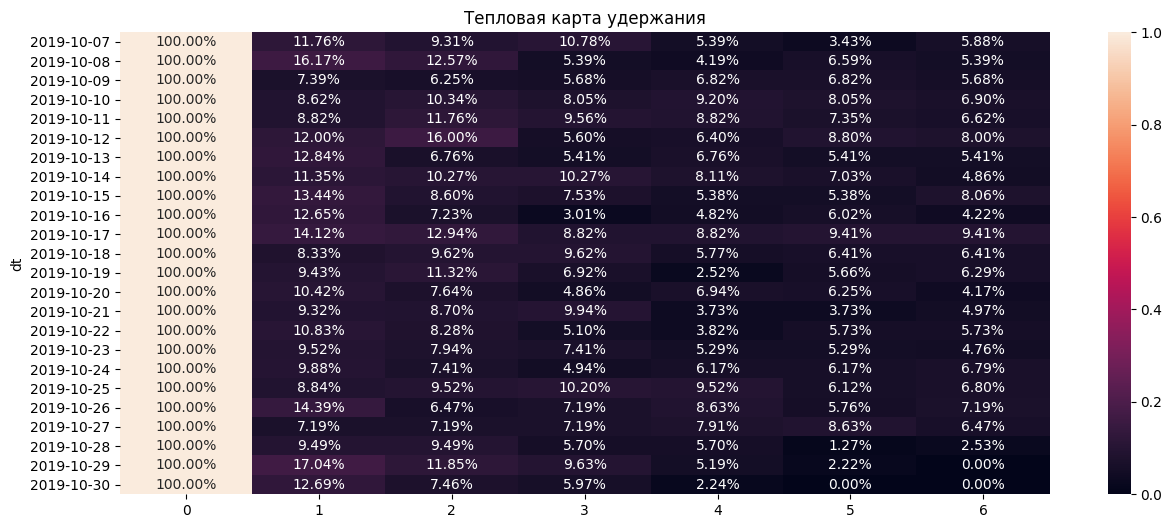

In [45]:
# Визуализируем полученные данные с помощью хитмэпа
plt.figure(figsize = (15, 6))  # задаём размер графика
sns.heatmap(retention.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '.2%'  # отображаем значения в виде процентов
           )
plt.title('Тепловая карта удержания')  # название графика
plt.show()

**Вывод: все когорты показывают примерно одинаковый невысокий уровень удержания клиентов. На 7 день лучше всех удержание у когорты от 17.10.2019.**

##### Рассчитаем время, проведенное пользователем в приложении

In [46]:
# Рассчитаем начало и конец для каждой сессии
duration = data.pivot_table(index='session_id', values='event_time', aggfunc=['min', 'max']).reset_index()
duration.head()

,session_id,min,max
,,event_time,event_time
0,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617
1,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948
2,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028
3,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203
4,5,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098


In [47]:
duration.columns = ['session_id', 'session_start', 'session_finish']

In [48]:
duration['session_start'] = pd.to_datetime(duration['session_start'])
duration['session_finish'] = pd.to_datetime(duration['session_finish'])

In [49]:
# Посчитаем длительность каждой сессии в секундах и минутах
duration['duration_in_seconds'] = (duration['session_finish'] - duration['session_start']).dt.seconds
duration['duration_in_minutes'] = round(duration['duration_in_seconds'] / 60, 2)
duration.head()

,session_id,session_start,session_finish,duration_in_seconds,duration_in_minutes
0,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92
1,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,507,8.45
2,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,899,14.98
3,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,758,12.63
4,5,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,1520,25.33


In [50]:
# Найдем медианное значение длительности сессии
duration['duration_in_minutes'].median()

5.58

**Вывод: медианное значение длительности сессии составляет 5,58 минуты. На мой взгляд это достаточно низкий результат.**

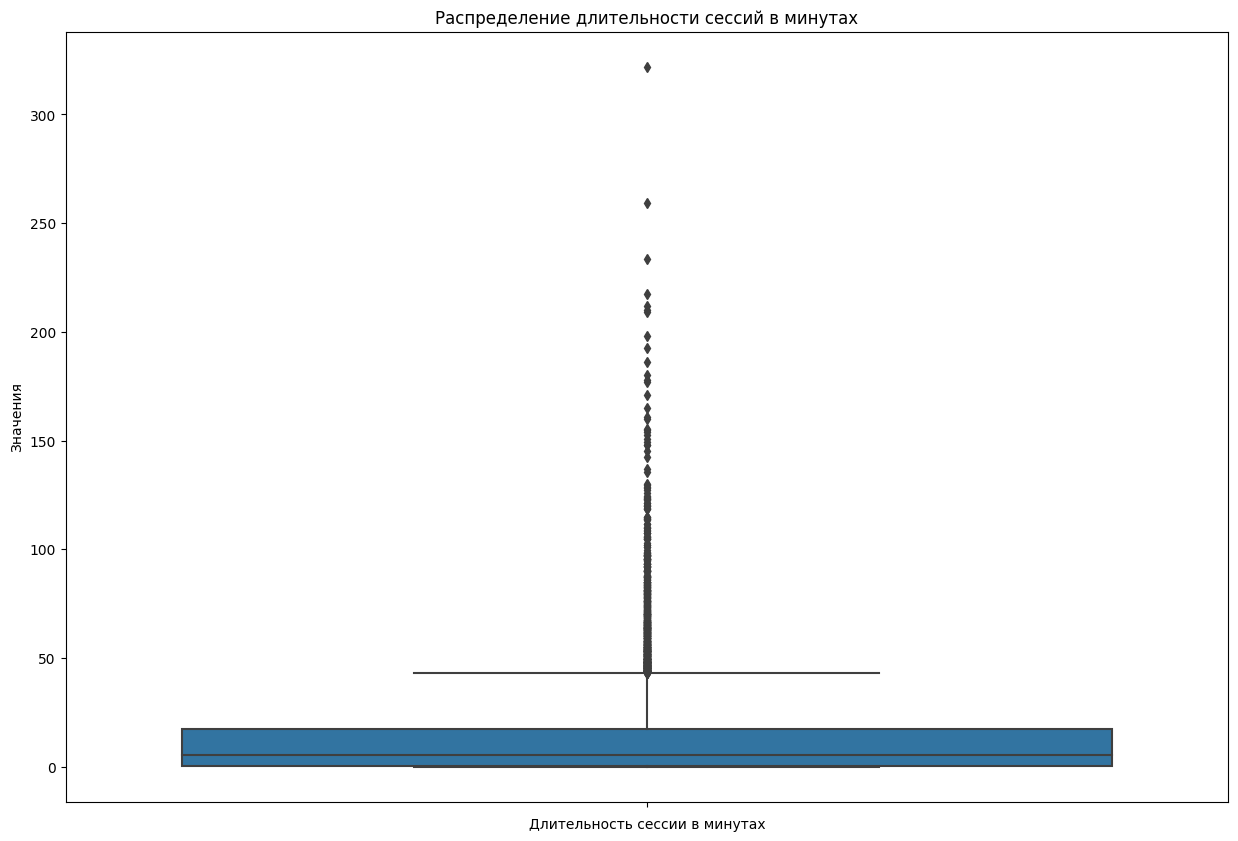

In [51]:
# Попробуем визуализировать полученные данные
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(y='duration_in_minutes', data=duration)
plt.title('Распределение длительности сессий в минутах')
plt.xlabel('Длительность сессии в минутах')
plt.ylabel('Значения')
plt.show()

In [52]:
# Посчитаем для столбца duration_in_minutes границы значений, после которых начинаются выбросы
q75_duration_in_minutes, q25_duration_in_minutes = duration['duration_in_minutes'].quantile([0.75, 0.25])
iqr_duration_in_minutes = q75_duration_in_minutes - q25_duration_in_minutes
lower_range_duration_in_minutes = q25_duration_in_minutes - 1.5 * iqr_duration_in_minutes
upper_range_duration_in_minutes = q75_duration_in_minutes + 1.5 * iqr_duration_in_minutes

print(iqr_duration_in_minutes)
print(lower_range_duration_in_minutes)
print(upper_range_duration_in_minutes)

17.072499999999998
-25.258749999999996
43.03125


**Вывод: на мой взгляд можно говорить о том, что длительность сессии варьируется о 0 до 43 минут. 
Также стоит отметить, что значений больше 43 минут достаточно много.**

##### Рассчитаем частоту совершения событий

**Посчитаем сколько событий происходило за каждый день. Эта операция аналогична той, которую мы уже делали в исследовательском анализе данных.**

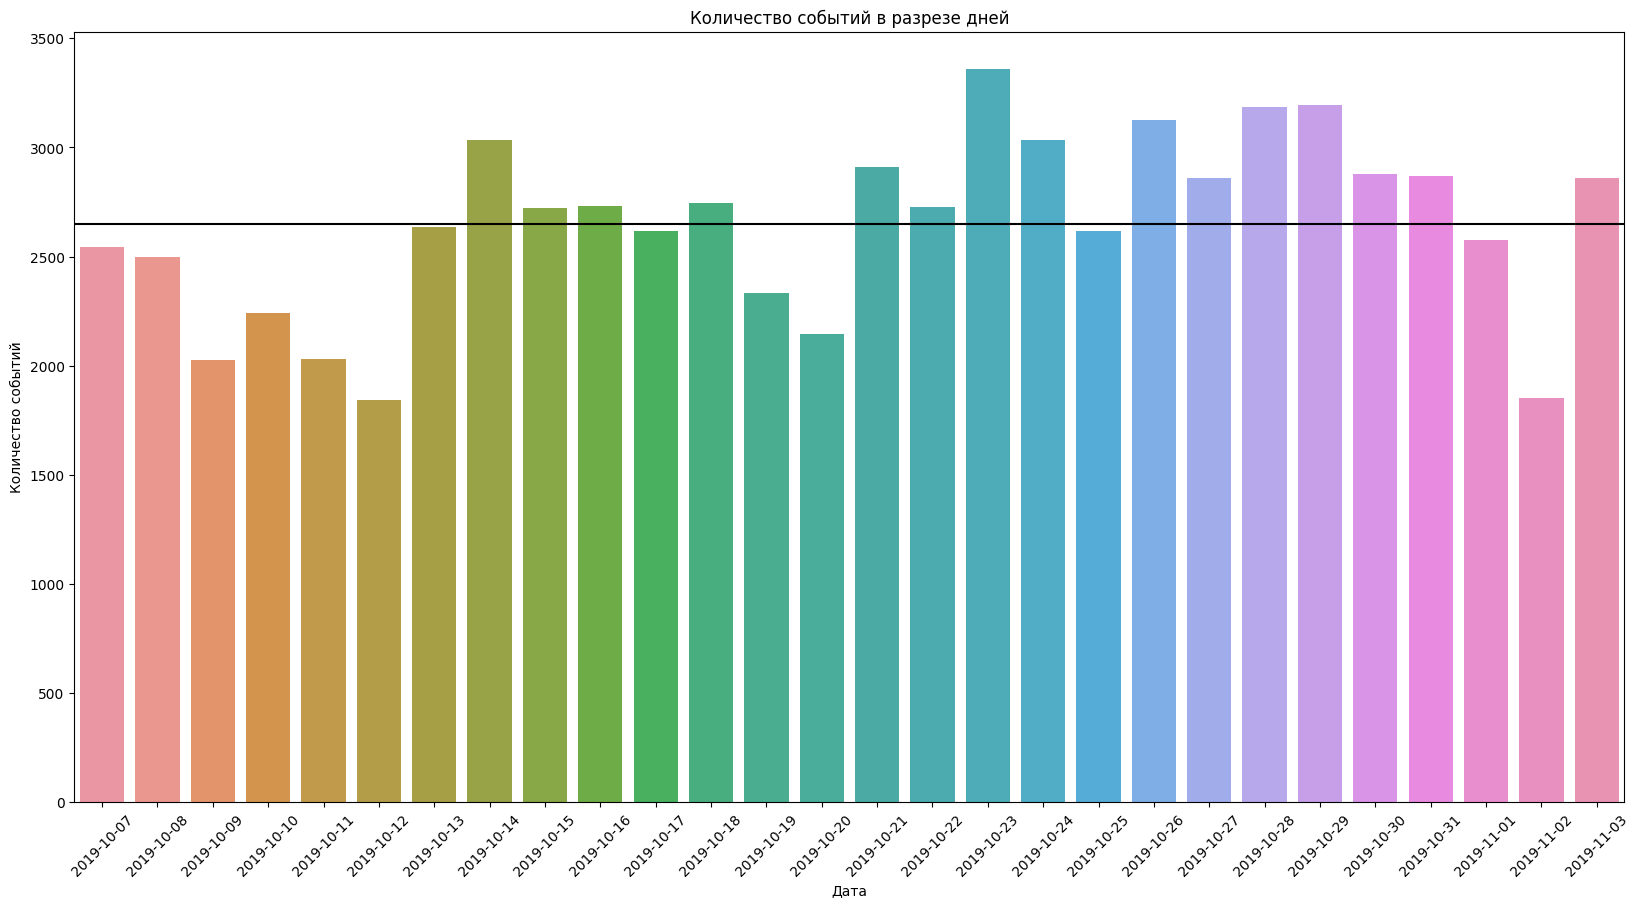

In [53]:
# Для лучшей наглядности построим столбчатую диаграмму
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x="date", y="event_name", data=events_per_date)
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Количество событий в разрезе дней')
plt.xticks(rotation='45')
plt.axhline(y=events_per_date['event_name'].mean(), color='black', linestyle='-')
plt.show();

**Вывод: в среднем в день происходило 2 650 событий, больше всего событий произошло 23.10.2019, меньше всего 12.10.2019. Также можно заметить, что количество событий снижается в выходные дни.** 

**Рассчитаем сколько событий происходит внутри одной сессии.**

In [54]:
events_count = data.pivot_table(index='session_id', values='event_time', aggfunc=['min', 'max', 'count']).reset_index()
events_count.head(20)

,session_id,min,max,count
,,event_time,event_time,event_time
0,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9
1,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,4
2,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,14
3,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,8
4,5,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,9
5,6,2019-10-20 18:49:24.115634,2019-10-20 20:05:36.234073,18
6,7,2019-10-24 10:50:40.219833,2019-10-24 10:57:12.675110,9
7,8,2019-10-29 21:18:24.850073,2019-10-29 22:10:25.712840,20
8,9,2019-10-30 07:50:45.948358,2019-10-30 08:26:53.933176,14


In [55]:
events_count.columns = ['session_id', 'session_start', 'session_finish', 'events_count']

In [56]:
# Найдем медианное значение количества событий за одну сессию
events_count['events_count'].median()

4.0

**Вывод: медианное значение количества событий за одну сессию равно 4. На мой взгляд это достаточно низкий результат и возможно он свидетельствует о том, что пользователи не находят то, что искали и быстро уходят.**

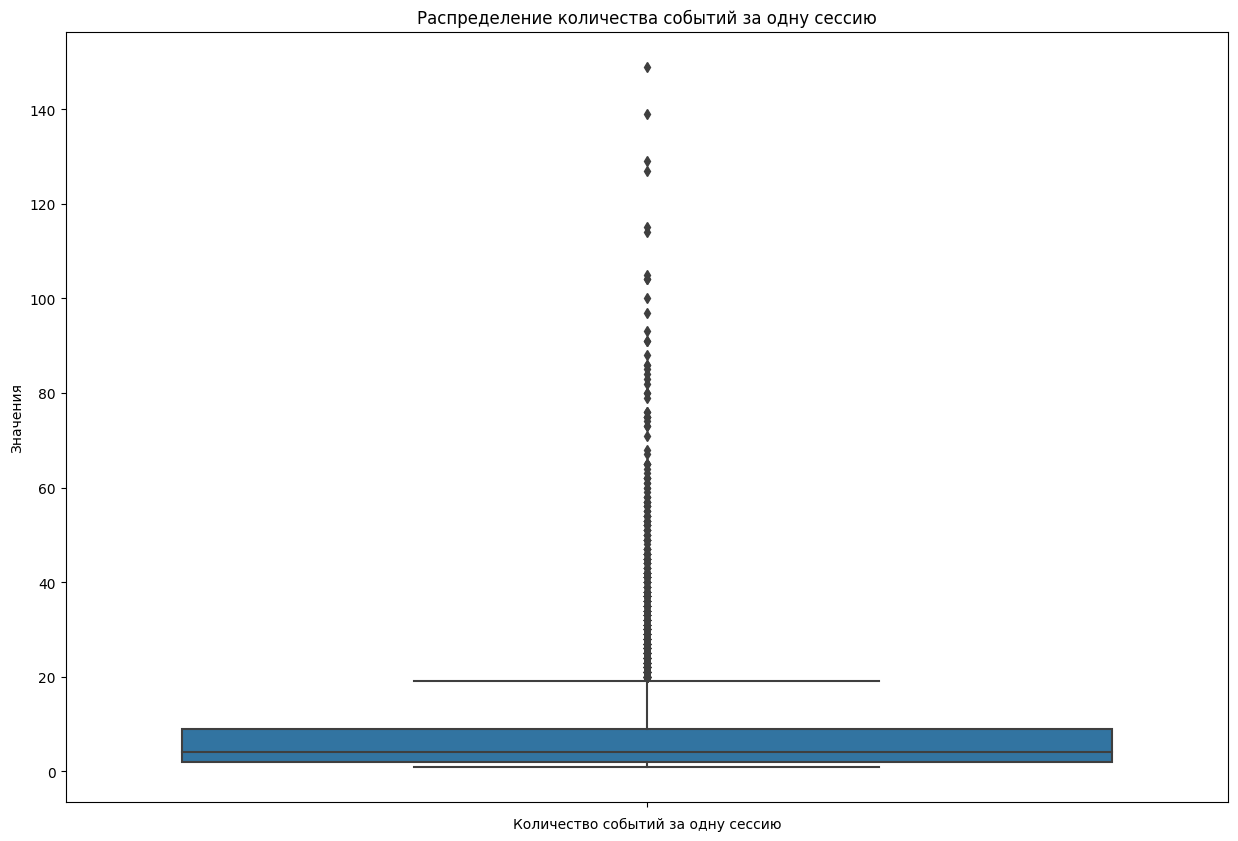

In [57]:
# Попробуем визуализировать полученные данные
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(y='events_count', data=events_count)
plt.title('Распределение количества событий за одну сессию')
plt.xlabel('Количество событий за одну сессию')
plt.ylabel('Значения')
plt.show()

In [58]:
# Посчитаем для столбца events_count границы значений, после которых начинаются выбросы
q75_events_count, q25_events_count = events_count['events_count'].quantile([0.75, 0.25])
iqr_events_count = q75_events_count- q25_events_count
lower_range_events_count = q25_events_count - 1.5 * iqr_events_count
upper_range_events_count = q75_events_count + 1.5 * iqr_events_count

print(iqr_events_count)
print(lower_range_events_count)
print(upper_range_events_count)

7.0
-8.5
19.5


**Вывод: на мой взгляд можно говорить о том, что количество событий за одну сессию варьируется о 0 до 20. Также стоит отметить, что значений больше 20 достаточно много.**

**Проверим в какое время дня происходит больше всего событий.**

In [59]:
events_count['hour'] = events_count['session_start'].dt.hour

In [60]:
events_count.head(10)

,session_id,session_start,session_finish,events_count,hour
0,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,9,13
1,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,4,18
2,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,14,19
3,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,8,11
4,5,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,9,21
5,6,2019-10-20 18:49:24.115634,2019-10-20 20:05:36.234073,18,18
6,7,2019-10-24 10:50:40.219833,2019-10-24 10:57:12.675110,9,10
7,8,2019-10-29 21:18:24.850073,2019-10-29 22:10:25.712840,20,21
8,9,2019-10-30 07:50:45.948358,2019-10-30 08:26:53.933176,14,7
9,10,2019-11-03 17:12:09.708771,2019-11-03 17:12:09.708771,1,17


In [61]:
events_per_hour = events_count.pivot_table(index='hour', values='events_count', aggfunc='sum').\
reset_index()
events_per_hour

,hour,events_count
0,0,1572
1,1,828
2,2,517
3,3,219
4,4,172
5,5,206
6,6,337
7,7,778
8,8,2086
9,9,3203


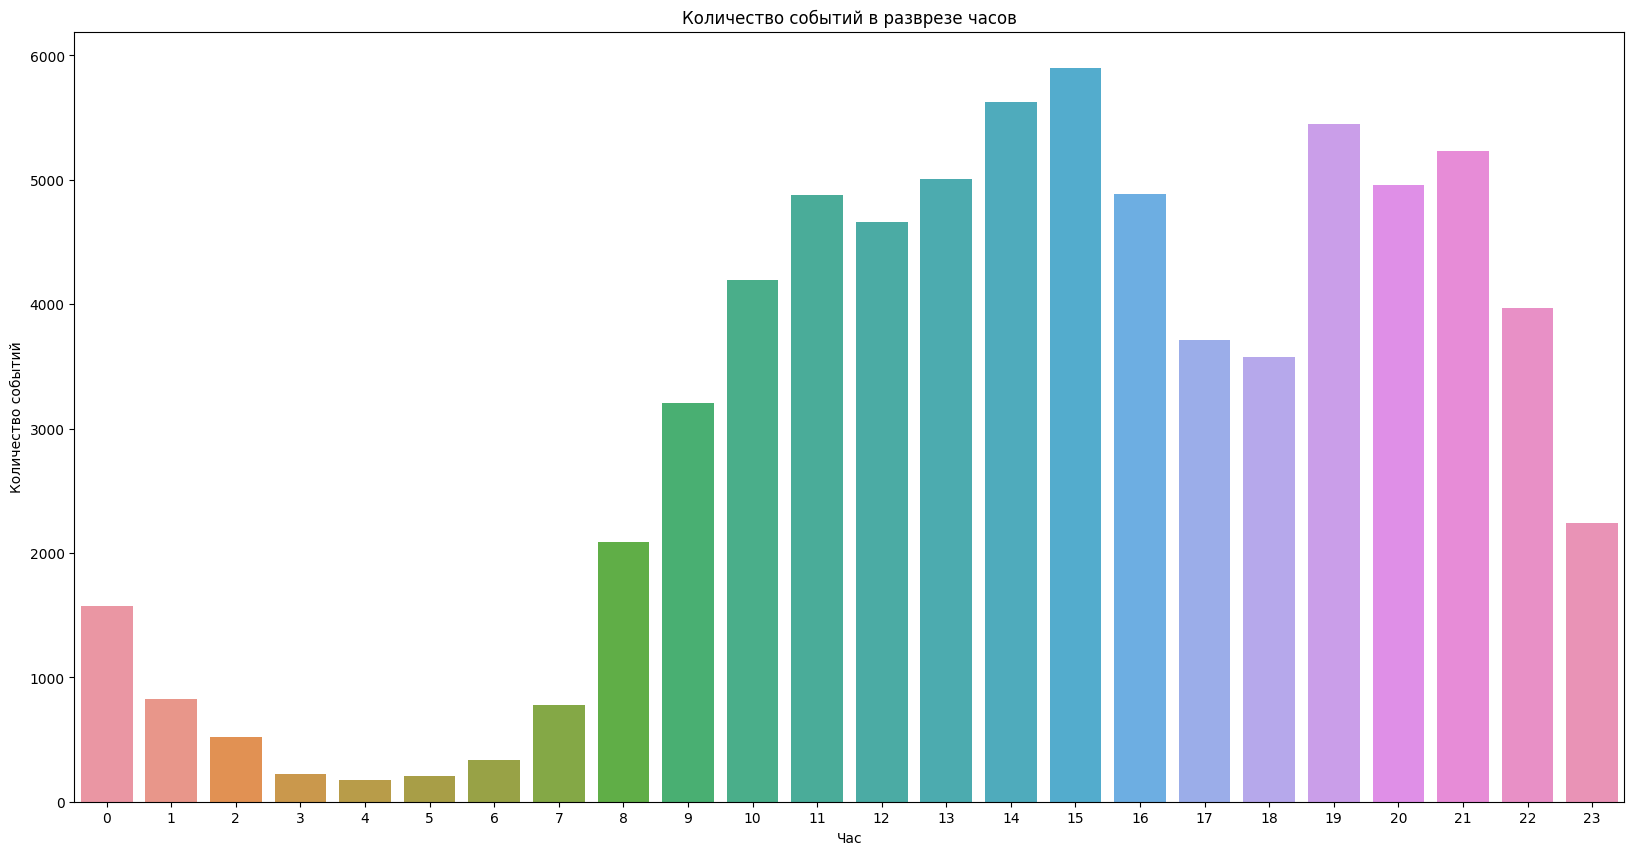

In [62]:
# Для лучшей наглядности построим столбчатую диаграмму
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x="hour", y="events_count", data=events_per_hour)
plt.xlabel('Час')
plt.ylabel('Количество событий')
plt.title('Количество событий в разврезе часов')
plt.show();

**Вывод: мы видим, что чаще всего события происходят в промежутках с 14 до 15 и с 19 до 21 часов.**

##### Рассчитаем конверсию в целевое действие - просмотр контактов

In [63]:
data.head()

,event_time,event_name,user_id,date,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1


In [64]:
# Рассчитаем сколько уникальных пользователей совершили целевое действие
data[data['event_name'] == 'contacts_show']['user_id'].nunique()

981

In [65]:
# Рассчитаем конверсию
conversion = round(100 * (data[data['event_name'] == 'contacts_show']['user_id'].nunique() / data['user_id'].nunique()), 2)
conversion

22.85

**Вывод: конверсия в целевое действие составляет 23%, что на мой взгляд является хорошим результатом. Возможно низкие значения длительности сессий и количества событий за одну сессию наоборот говорят об эфекктивности приложения, т.е о том, что люди оперативно находят то, что им надо.**

**Теперь посчитаем конверсию отдельно для каждой когорты из расчета Retention rate.**

In [66]:
# Выделим список дат, которые соответствуют названиям когорт
maximum_date = datetime(2019, 10, 30).date()
minimum_date = datetime(2019, 10, 7).date()

In [67]:
spisok = profiles.query('dt <= @maximum_date and dt >= @minimum_date')['dt'].unique()
spisok 

array([datetime.date(2019, 10, 7), datetime.date(2019, 10, 19),
       datetime.date(2019, 10, 18), datetime.date(2019, 10, 25),
       datetime.date(2019, 10, 27), datetime.date(2019, 10, 11),
       datetime.date(2019, 10, 21), datetime.date(2019, 10, 8),
       datetime.date(2019, 10, 13), datetime.date(2019, 10, 20),
       datetime.date(2019, 10, 22), datetime.date(2019, 10, 29),
       datetime.date(2019, 10, 15), datetime.date(2019, 10, 26),
       datetime.date(2019, 10, 10), datetime.date(2019, 10, 17),
       datetime.date(2019, 10, 23), datetime.date(2019, 10, 14),
       datetime.date(2019, 10, 9), datetime.date(2019, 10, 24),
       datetime.date(2019, 10, 30), datetime.date(2019, 10, 12),
       datetime.date(2019, 10, 16), datetime.date(2019, 10, 28)],
      dtype=object)

In [68]:
# Создадим цикл в котором будем перебирать каждую дату из списка выше и для каждой даты будем находить значение конверсии
i = []
for h in spisok:
    prof_check = profiles.query('dt == @h')
    
    all_users = data.loc[data['user_id'].isin(prof_check['user_id'])]['user_id'].nunique()
    
    goal_users =  data[np.logical_and(data['user_id'].isin(prof_check['user_id']), data['event_name'] == 'contacts_show')]\
    ['user_id'].nunique()
    
    result = goal_users / all_users
    
    i.append(result)

In [69]:
# Соберем таблицу в которой будут даты, т.е названия когорт и значения конверсии
dataset = pd.DataFrame({'period': spisok, 'conversion': i})

In [70]:
dataset = dataset.sort_values(by='period', ascending=True)
dataset

,period,conversion
0,2019-10-07,0.250000
7,2019-10-08,0.233533
18,2019-10-09,0.284091
14,2019-10-10,0.235632
5,2019-10-11,0.220588
21,2019-10-12,0.240000
8,2019-10-13,0.209459
17,2019-10-14,0.200000
12,2019-10-15,0.182796
22,2019-10-16,0.180723


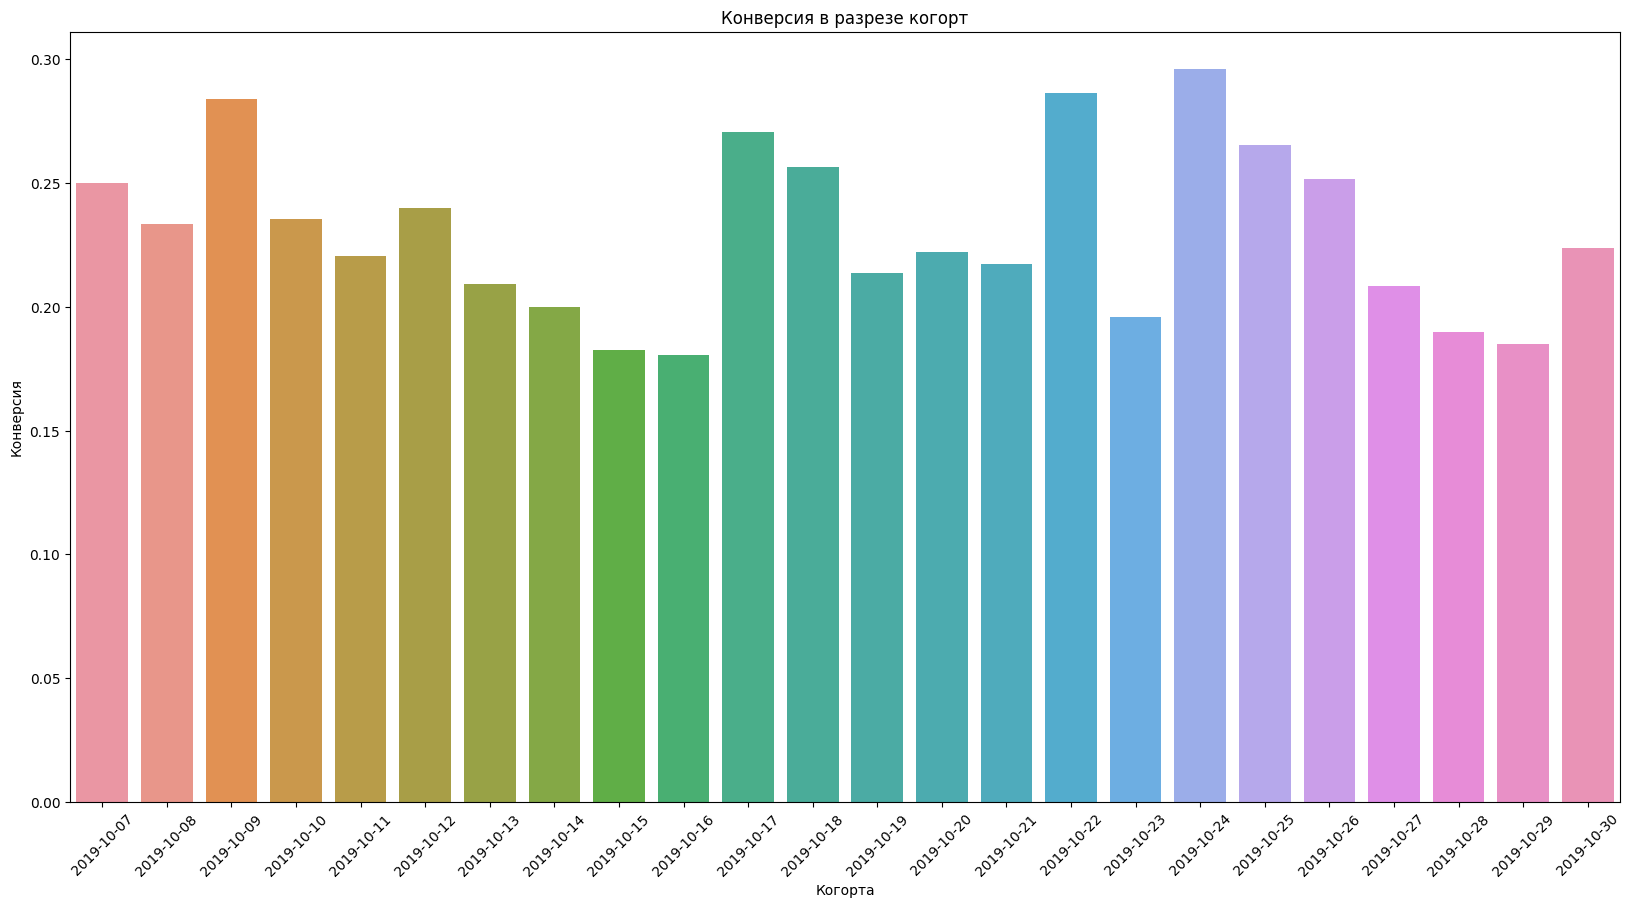

In [71]:
# Визуализируем полученные данные
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x="period", y="conversion", data=dataset)
plt.xlabel('Когорта')
plt.ylabel('Конверсия')
plt.title('Конверсия в разрезе когорт')
plt.xticks(rotation='45')
plt.show();

**Вывод: конверсия варьируется от 17% до 30% в зависимости от когорты. Лучший результат у когорты от 24.10.2019.**

### Вывод: мы рассчитали Retention rate, время, проведенное пользователями в приложении, конверсию в целевое действие, рассмотрели в разных аспектах частоту совершения действий в приложении. Нам удалось установить следующее:
1. все когорты показывают примерно одинаковый невысокий уровень удержания клиентов. На 7 день лучше всех удержание у когорты от 17.10.2019.
2. длительность сессии варьируется о 0 до 43 минут, медианное значение длительности сессии составляет 5,58 минуты.
3. в среднем в день происходило 2 650 событий, больше всего событий произошло 23.10.2019, меньше всего 12.10.2019. Также можно заметить, что количество событий снижается в выходные дни.
4. количество событий за одну сессию варьируется о 0 до 20, медианное значение количества событий за одну сессию равно 4.
5. чаще всего события происходят в промежутках с 14 до 15 и с 19 до 21 часов.
6. конверсия в целевое действие составляет 23%.
7. в разрезе когорт конверсия варьируется от 17% до 30%.

## 5. Сегментация пользователей

##### Выделение критерия для сегментации
Так как у нас нет данных о покупках и у нас не стоит цели проанализировать рекламную компанию, то на мой взгляд самый логичный способ разделения пользователей это деление по времени сессии в приложении.

Разделим пользователей на следующие сегменты:
- Segment_1 - сессия меньше 10 минут
- Segment_2 - сессия от 10 до 20 минут
- Segment_3 - сессия от 20 до 30 минут
- Segment_4 - сессия от 30 минут и больше

Такой подход позволит выделить пользователей, которые проводят в приложении совсем мало времени (Segment_1) и возможно оно их не устраивает. Т.е потом можно будет отдельно изучить поведение именно этих пользователей, чтобы понять, что им не нравится и как можно улучшить приложение. 

Segment_2 и Segment_3 помогут выделить пользователей, которым приложение нравится, но возможно они не всегда находят товар, который им нужен. На основе таких пользователей можно будет изучить предложений по каким товарам не хватает.
Segment_4 - это потенциально самые лояльные пользователи, которым нравится приложение и которые готовы проводить в нем много времени, чтобы найти нужный товар.

На мой взгляд Segment_4 или Segment_3 должен показать лучшие результаты по конверсии и Retention rate и соответственно стать целевым.

In [72]:
data.head()

,event_time,event_name,user_id,date,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1


In [73]:
duration.head()

,session_id,session_start,session_finish,duration_in_seconds,duration_in_minutes
0,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92
1,2,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,507,8.45
2,3,2019-10-21 19:52:30.778932,2019-10-21 20:07:30.051028,899,14.98
3,4,2019-10-22 11:18:14.635436,2019-10-22 11:30:52.807203,758,12.63
4,5,2019-10-19 21:34:33.849769,2019-10-19 21:59:54.637098,1520,25.33


In [74]:
# Соединим таблицы data и duration
data_new = data.merge(duration, on='session_id', how='left')
data_new.head()

,event_time,event_name,user_id,date,session_id,session_start,session_finish,duration_in_seconds,duration_in_minutes
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92


In [75]:
# Для каждого пользователя вычислим медианное значение длительности сессии
duration_per_user = data_new.pivot_table(index='user_id', values='duration_in_minutes', aggfunc='median').reset_index()
duration_per_user.head()

,user_id,duration_in_minutes
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,12.630
1,00157779-810c-4498-9e05-a1e9e3cedf93,52.000
2,00463033-5717-4bf1-91b4-09183923b9df,24.700
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,33.065
4,00551e79-152e-4441-9cf7-565d7eb04090,9.270


In [76]:
# Создадим функцию, которая будет относить пользователя к соответствующему сегменту
def categorize_segment(duration):
    try:
        if 0 <= duration <= 10:
            return 'Segment_1'
        elif 10.01 <= duration <= 20:
            return 'Segment_2'
        elif 20.01 <= duration <= 30:
            return 'Segment_3'
        elif duration >= 30.01:
            return 'Segment_4'
    except:
        pass

In [77]:
duration_per_user['Segment'] = duration_per_user['duration_in_minutes'].apply(categorize_segment)
duration_per_user.head()

,user_id,duration_in_minutes,Segment
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,12.630,Segment_2
1,00157779-810c-4498-9e05-a1e9e3cedf93,52.000,Segment_4
2,00463033-5717-4bf1-91b4-09183923b9df,24.700,Segment_3
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,33.065,Segment_4
4,00551e79-152e-4441-9cf7-565d7eb04090,9.270,Segment_1


In [78]:
# Убедимся, что в каждый сегмент попало не меньше 10% от общего числа уникальных пользователей
cohort_1 = duration_per_user.query('Segment == "Segment_1"')['user_id'].nunique()
cohort_1

1963

In [79]:
cohort_2 = duration_per_user.query('Segment == "Segment_2"')['user_id'].nunique()
cohort_2

992

In [80]:
cohort_3 = duration_per_user.query('Segment == "Segment_3"')['user_id'].nunique()
cohort_3

558

In [81]:
cohort_4 = duration_per_user.query('Segment == "Segment_4"')['user_id'].nunique()
cohort_4

780

In [82]:
# Получим список пользователей каждого сегмента
segment_1 = duration_per_user.query('Segment == "Segment_1"')['user_id']
segment_2 = duration_per_user.query('Segment == "Segment_2"')['user_id']
segment_3 = duration_per_user.query('Segment == "Segment_3"')['user_id']
segment_4 = duration_per_user.query('Segment == "Segment_4"')['user_id']

##### Рассчитаем Retention rate для каждого сегмента

In [83]:
# Создадим профили пользователей для первого сегмента
profiles_1 = profiles.loc[data['user_id'].isin(segment_1)]

In [84]:
# Построим таблицу удержания для первого сегмента
retention_raw_1, retention_1 = get_retention(
    profiles_1, sessions, datetime(2019, 11, 5).date(), 7)
retention_1

,cohort_size,0,1,2,3,4,5,6
dt,,,,,,,,
2019-10-07,39,1.0,0.153846,0.102564,0.102564,0.025641,0.051282,0.102564
2019-10-08,31,1.0,0.161290,0.096774,0.064516,0.000000,0.096774,0.032258
2019-10-09,35,1.0,0.085714,0.114286,0.114286,0.028571,0.057143,0.057143
2019-10-10,41,1.0,0.073171,0.073171,0.073171,0.170732,0.146341,0.073171
2019-10-11,28,1.0,0.107143,0.071429,0.035714,0.000000,0.071429,0.000000
2019-10-12,24,1.0,0.041667,0.208333,0.041667,0.125000,0.166667,0.166667
2019-10-13,31,1.0,0.096774,0.032258,0.032258,0.096774,0.064516,0.032258
2019-10-14,33,1.0,0.121212,0.121212,0.151515,0.060606,0.121212,0.090909
2019-10-15,38,1.0,0.052632,0.078947,0.026316,0.078947,0.052632,0.052632


In [85]:
# Аналогично поступим для оставшихся трех сегментов
profiles_2 = profiles.loc[data['user_id'].isin(segment_2)]
profiles_3 = profiles.loc[data['user_id'].isin(segment_3)]
profiles_4 = profiles.loc[data['user_id'].isin(segment_4)]

retention_raw_2, retention_2 = get_retention(profiles_2, sessions, datetime(2019, 11, 5).date(), 7)
retention_raw_3, retention_3 = get_retention(profiles_3, sessions, datetime(2019, 11, 5).date(), 7)
retention_raw_4, retention_4 = get_retention(profiles_4, sessions, datetime(2019, 11, 5).date(), 7)

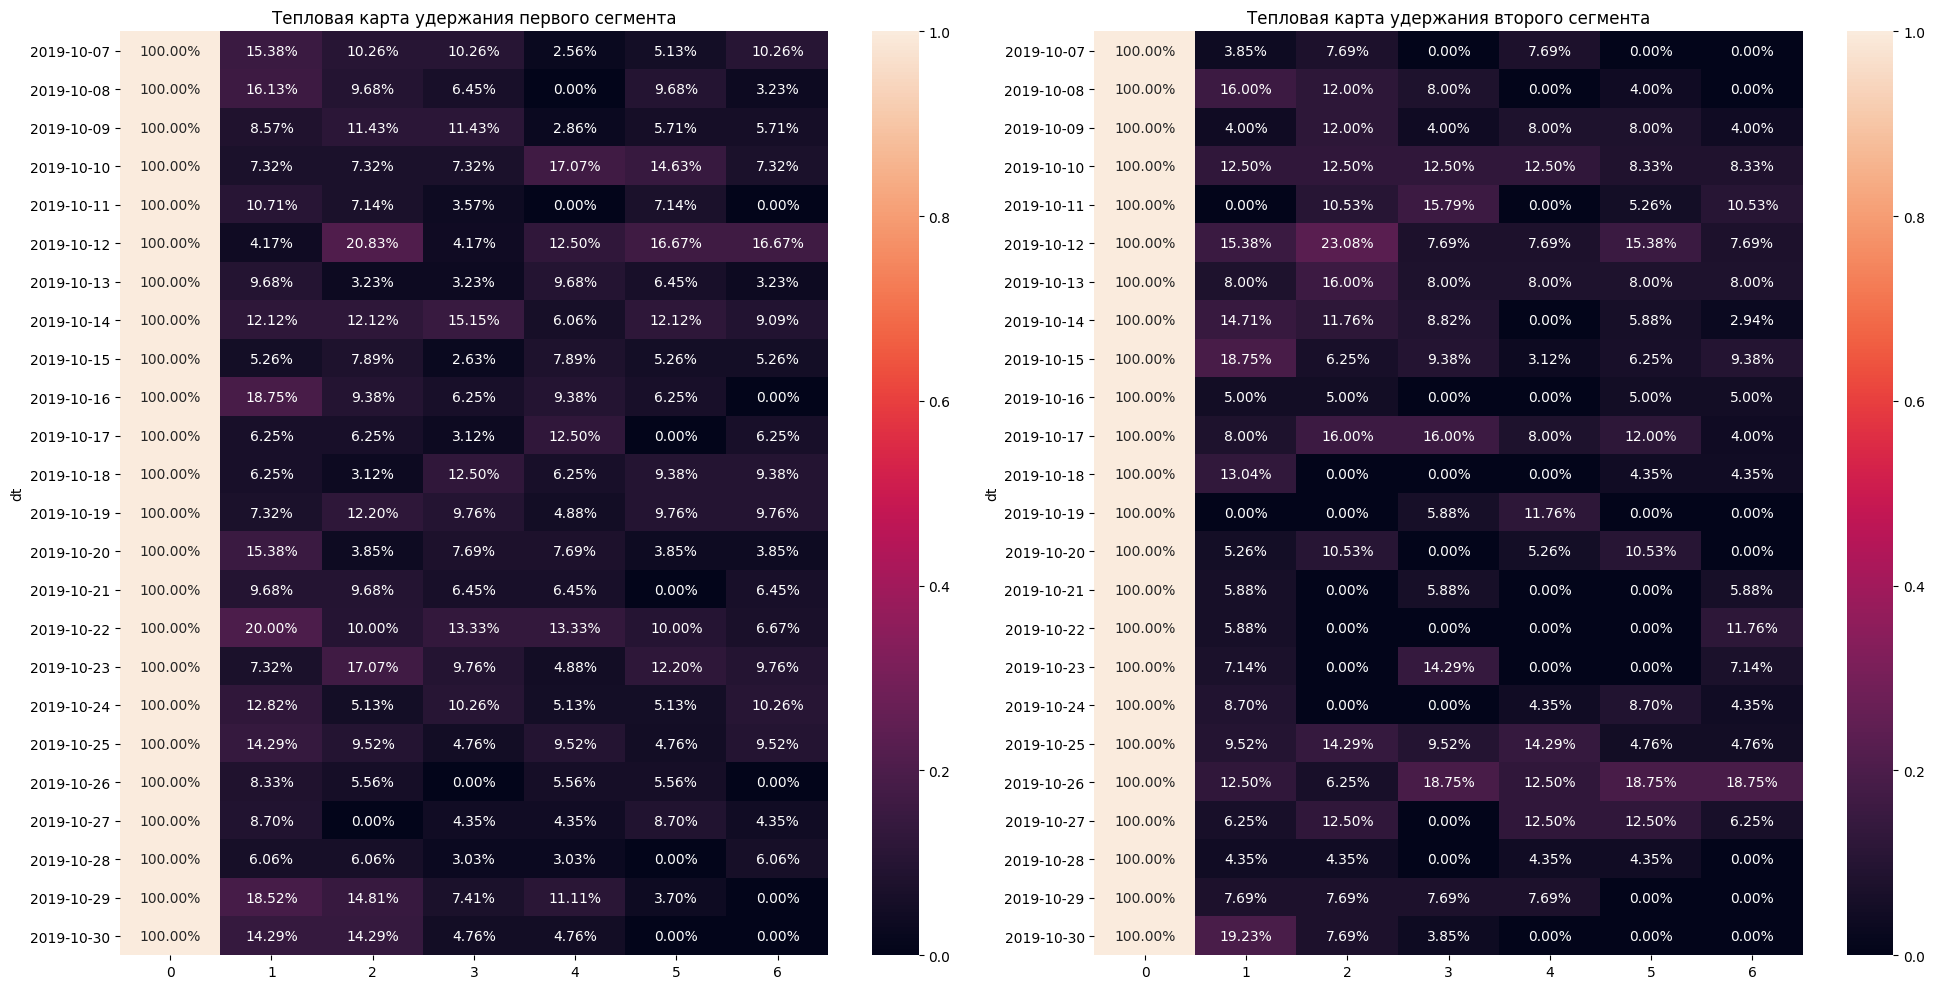

In [86]:
# Для большей наглядности отдельно построим хитмэпы для первого и второго сегментов и отдельно для третьего и четвертого
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.heatmap(retention_1.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '.2%'  # отображаем значения в виде процентов
           )
plt.title('Тепловая карта удержания первого сегмента')  # название графика

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.heatmap(retention_2.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '.2%'  # отображаем значения в виде процентов
           )
plt.title('Тепловая карта удержания второго сегмента')  # название графика


plt.tight_layout()
plt.show()

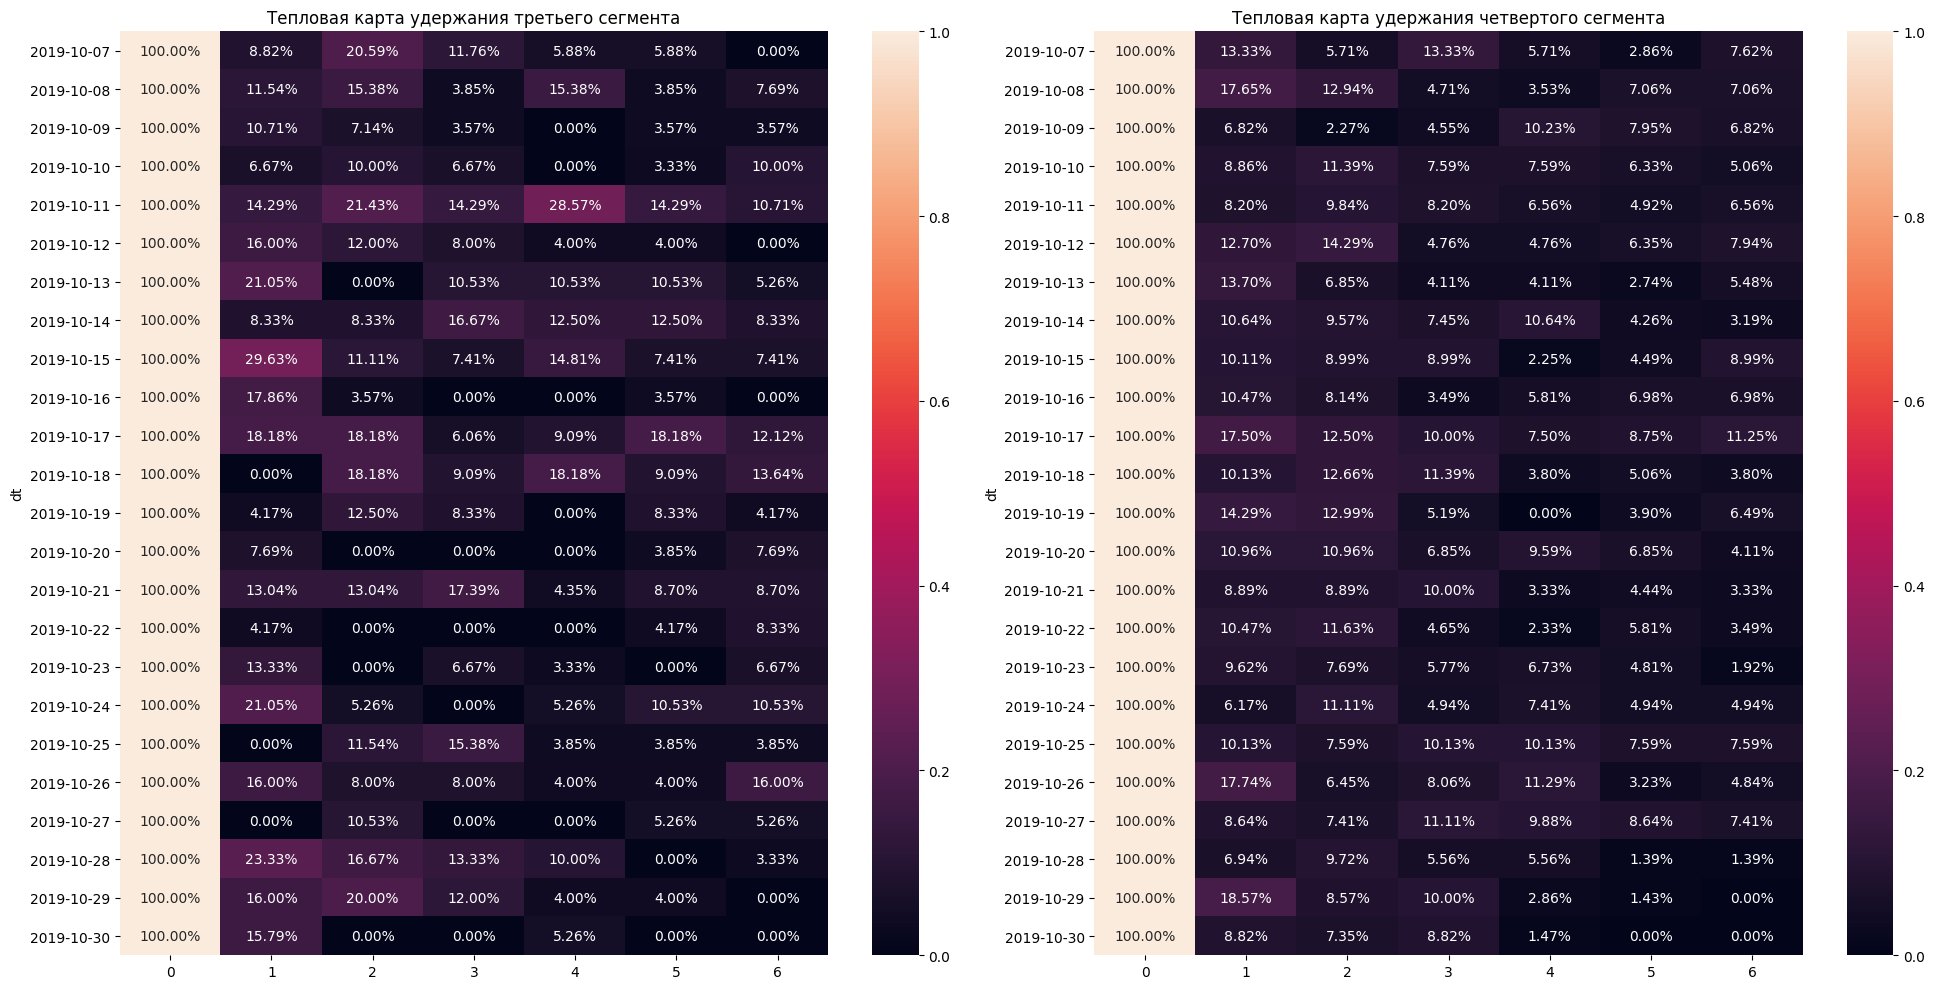

In [87]:
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.heatmap(retention_3.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '.2%'  # отображаем значения в виде процентов
           )
plt.title('Тепловая карта удержания третьего сегмента')  # название графика

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.heatmap(retention_4.drop(columns = ['cohort_size']), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '.2%'  # отображаем значения в виде процентов
           )
plt.title('Тепловая карта удержания четвертого сегмента')  # название графика


plt.tight_layout()
plt.show()

**Так как по графикам тяжело сделать какой-то вывод, то дополнительно для каждого сегмента посчитаем среднее значение удержания на 7 день.**

In [88]:
print('среднее значение удержания на 7 день для первого сегмента: ', round(retention_1[6].mean(), 4))
print('среднее значение удержания на 7 день для второго сегмента: ', round(retention_2[6].mean(), 4))
print('среднее значение удержания на 7 день для третьего сегмента: ', round(retention_3[6].mean(), 4))
print('среднее значение удержания на 7 день для четвертого сегмента: ', round(retention_4[6].mean(), 4))

среднее значение удержания на 7 день для первого сегмента:  0.0596
среднее значение удержания на 7 день для второго сегмента:  0.0513
среднее значение удержания на 7 день для третьего сегмента:  0.0639
среднее значение удержания на 7 день для четвертого сегмента:  0.0526


**Вывод: принципиального различия между сегментами в разрезе удержания нет, третий сегмент чуть лучше других.**

##### Рассчитаем конверсию в целевое действие - просмотр контактов для каждого сегмента

In [89]:
# Создадим функцию, которая в зависимости от сегмента и названия события будет считать соответствующую конверсию
def function_conversion(table, segment, name_of_event):
    all_users = table.loc[table['user_id'].isin(segment)]['user_id'].nunique()
    
    goal_users = table[np.logical_and(table['user_id'].isin(segment), data['event_name'] == name_of_event)]\
    ['user_id'].nunique()
    
    result = goal_users / all_users
    
    return round(result, 4)

In [90]:
conversion_1 = function_conversion(table=data, segment=segment_1, name_of_event='contacts_show')
print(f'Конверсия для первого сегмента равна: {conversion_1}')

conversion_2 = function_conversion(table=data, segment=segment_2, name_of_event='contacts_show')
print(f'Конверсия для второго сегмента равна: {conversion_2}')

conversion_3 = function_conversion(table=data, segment=segment_3, name_of_event='contacts_show')
print(f'Конверсия для второго сегмента равна: {conversion_3}')

conversion_4 = function_conversion(table=data, segment=segment_4, name_of_event='contacts_show')
print(f'Конверсия для второго сегмента равна: {conversion_4}')

Конверсия для первого сегмента равна: 0.2012
Конверсия для второго сегмента равна: 0.2137
Конверсия для второго сегмента равна: 0.2401
Конверсия для второго сегмента равна: 0.3077


**Вывод: четвертый сегмент (пользователи, которые в среднем проводят в приложении больше 30 минут) показывает гораздо лучшую конверсию чем другие.**

### Вывод: мы провели сегментацию пользователей , для каждого сегмента рассчитали Retention rate и конверсию. Нам удалось установить следующее:
1. сегментация была выполнена по длительности нахождения пользователя в приложении. Всего было выделено 4 сегмента.
2. принципиального различия между сегментами в разрезе удержания нет.
3. четвертый сегмент (пользователи, которые в среднем проводят в приложении больше 30 минут) показывает гораздо лучшую конверсию чем другие.
### Учитывая вышесказанное, предлагаю определить четвертый сегмент, как целевой. 

## 6. Проверка гипотез

##### Проверим гипотезу о том, что пользователи из разных источников показывают разную конверсию в целевое действие

**Составим нулевую и альтернативную гипотезы:**

H0: Конверсия в целевое действие пользователей из Yandex равна конверсии пользователей из Google.

H1: Конверсия в целевое действие пользователей из Yandex не равна конверсии пользователей из Google.

**Проверим корректность разбиения пользователей на группы**

In [91]:
# Разделим таблицу mobile_sources на таблицы по источникам
users_yandex = source.query('source == "yandex"')
users_google = source.query('source == "google"')

In [92]:
source.head()

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [93]:
# Получим id пользователей, которые встречаются в обеих таблицах 
first_in_second = users_yandex.loc[users_yandex['user_id'].isin(users_google['user_id'])]['user_id']
second_in_first = users_google.loc[users_google['user_id'].isin(users_yandex['user_id'])]['user_id']

In [94]:
# Объединим пользователей и удалим повторяющиеся значения
repeating_users = pd.concat([first_in_second, second_in_first], axis=0).drop_duplicates()

In [95]:
# Посчитаем количество пользователей, попавших в обе группы
repeating_users.shape[0]

0

**Вывод: разбиение пользователей на группы выполнено корректно.**

**Перейдем к проверке гипотезы**

In [96]:
# Добавим источник в таблицу data_new
data_new = data_new.merge(source, on='user_id', how='left')
data_new.head()

,event_time,event_name,user_id,date,session_id,session_start,session_finish,duration_in_seconds,duration_in_minutes,source
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92,other
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92,other
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92,other
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92,other
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92,other


In [97]:
# Посчитаем число пользователей, совершивших целевое событие в каждой из контрольных групп
success_yandex = data_new.query('event_name == "contacts_show" and source == "yandex"')['user_id'].nunique()
success_google = data_new.query('event_name == "contacts_show" and source == "google"')['user_id'].nunique()
display(success_yandex)
success_google

478

275

In [98]:
# Посчитаем общее число пользователей в каждой из контрольных групп
trials_yandex = data_new.query('source == "yandex"')['user_id'].nunique()
trials_google = data_new.query('source == "google"')['user_id'].nunique()
display(trials_yandex)
trials_google

1934

1129

In [99]:
# Проверим гипотезу с помощью встроенного z-test
alpha = .05
count = np.array([success_yandex, success_google])
nobs = np.array([trials_yandex, trials_google])
stat, p_value = proportions_ztest(count, nobs)
print('p-значение: ', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод: статистически значимой разницы, между контрольными группами пользователей, совершивших событие contacts_show, нет. Следовательно, нельзя говорить о том, что две эти группы демонстрируют разную конверсию.**

##### Проверим гипотезу о том, что пользователи, пришедшие из Yandex проводят больше времени в приложении чем пользователи из Google.

**Составим нулевую и альтернативную гипотезы:**
    
H0: Среднее время, которое пользователи из Yandex проводят в приложении равно среднему времени, которое пользователи из Google проводят в приложении.

H1: Среднее время, которое пользователи из Yandex проводят в приложении статистически значимо больше среднего времени, которое пользователи из Google проводят в приложении.

**Будем использовать Гипотезу о равенстве средних двух генеральных совокупностей, так как пользовательские сессии не зависят друг от друга.**
**Для каждого пользователя посчитаем среднее значение времени сессии, наборы этих значений в зависимости от источника привлечения примем за две генеральные совокупности.**


In [100]:
data_new.head()

,event_time,event_name,user_id,date,session_id,session_start,session_finish,duration_in_seconds,duration_in_minutes,source
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92,other
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92,other
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92,other
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92,other
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,1,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,595,9.92,other


In [101]:
# Для каждого пользователя вычислим среднее значение длительности сессии, также добавим в таблицу источник привлечения
mean_duration_per_user = data_new.pivot_table(index='user_id', 
                                              values=['duration_in_minutes', 'source'], 
                                              aggfunc={'duration_in_minutes': 'mean', 'source' : 'first'}).reset_index()
mean_duration_per_user.head()

,user_id,duration_in_minutes,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,12.395429,other
1,00157779-810c-4498-9e05-a1e9e3cedf93,45.127042,yandex
2,00463033-5717-4bf1-91b4-09183923b9df,24.700000,yandex
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,23.271563,google
4,00551e79-152e-4441-9cf7-565d7eb04090,5.806250,yandex


In [102]:
# Создадим выборки и посчитаем их размеры
sample_yandex = mean_duration_per_user.query('source == "yandex"')['duration_in_minutes']
sample_google = mean_duration_per_user.query('source == "google"')['duration_in_minutes']

display(len(sample_yandex))
len(sample_google)

1934

1129

**Сначала проверим, как распределяются средние каждой выборки. Напишем цикл в котором будем моделировать выборки из генеральной совокупности и считать их среднее. Далее построим распределение этих средних.**

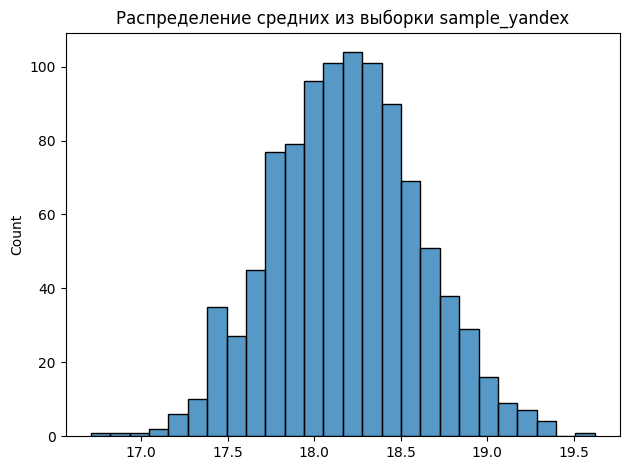

In [103]:
i = []
for j in range(1000):
    i.append(sample_yandex.sample(1000).mean())
sns.histplot(i)
plt.title('Распределение средних из выборки sample_yandex')
plt.tight_layout()
plt.show()

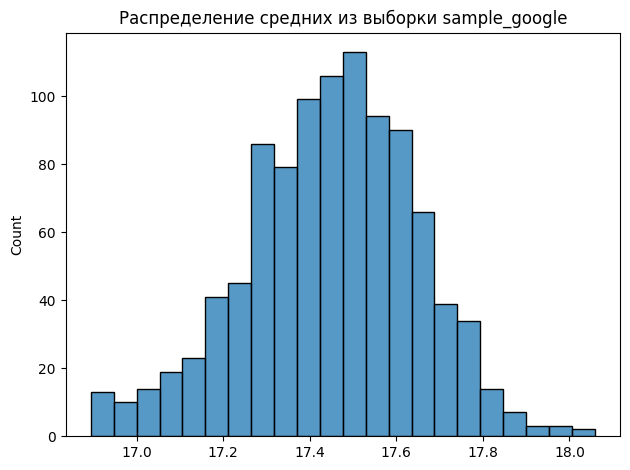

In [104]:
i = []
for j in range(1000):
    i.append(sample_google.sample(1000).mean())
sns.histplot(i)
plt.title('Распределение средних из выборки sample_google')
plt.tight_layout()
plt.show()

**Вывод: распределения средних в целом похожи на нормальное распределение, значит для проверки гипотезы мы можем использовать критерий Стьюдента (t-тест для независимых выборок). Также обе выборки достаточно велики по размеру (больше 30), соответственно, нет ограничений для использования данного критерия.**
**Уровень значимости зададим равным 0,05.
Так как генеральные совокупности не равны по размеру и мы не можем быть на 100% уверенными, что у них одинаковые дисперсии, то параметру equal_var присвоим значение False.**

In [105]:
alpha = 0.05
results = st.ttest_ind(sample_yandex, sample_google, alternative='greater', equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14726665615762413
Не получилось отвергнуть нулевую гипотезу


**Вывод: так как p-value оказался больше уровня значимости, то нельзя сделать вывод о том, что пользователи из Yandex проводят в приложении больше времени, чем пользователи из Google.**

### Вывод: в этом разделе мы проверили 2 гипотезы. Нам удалось установить следующее:
1. нельзя говорить о том, что пользователи из Yandex и Google демонстрируют разную конверсию в целевое действие.
2. нельзя сделать вывод о том, что пользователи из Yandex проводят в приложении больше времени, чем пользователи из Google.
3. учитывая вышесказанное, на мой взгляд нет смысла производить сегментацию на основе источника привлечения.
#### Учитывая вышесказанное, предлагаю определить четвертый сегмент, как целевой. 

# Общий вывод по проекту:
В этом проекте мы выбирали методику сегментации пользователей, делили пользователей на сегменты в зависимости от их поведения, выбирали целевой сегмент пользователей, под который потом будут улучшать приложение.

Проект разделен на несколько частей: в первой части мы изучали общую информацию о представленных данных.

Во второй части мы занимались предобработкой данных, проверяли наличие пропусков, проверяли наличие явных и неявных дубликатов. Нам удалось установить следующее:
1. явных дубликатов и пропусков обнаружено не было. 
2. были обнаружены и исправлены неявные дубликаты в столбце event_name таблицы data.

В третьей части мы занимались исследовательским анализом данных. Нам удалось установить следующее:
1. в таблице представлены данные с 7 октября по 3 ноября 2019 года
2. чаще всего встречается событие tips_show, событие search_7 встречается реже всех.
3. в таблице представлено 4 293 уникальных пользователей.
4. в среднем в день происходило 2 650 событий, больше всего событий произошло 23.10.2019, меньше всего 12.10.2019. Также можно заметить, что количество событий снижается в выходные дни.
5. в среднем на одного пользователя приходится 17 событий.

В четвертой части мы выделяли группы пользователей, рассчитывали Retention rate, время, проведенное пользователем в приложении, частоту совершения действий, конверсию в целевое действие. Нам удалось установить следующее:
1. все когорты показывают примерно одинаковый невысокий уровень удержания клиентов. На 7 день лучше всех удержание у когорты от 17.10.2019.
2. длительность сессии варьируется о 0 до 43 минут, медианное значение длительности сессии составляет 5,58 минуты.
3. в среднем в день происходило 2 650 событий, больше всего событий произошло 23.10.2019, меньше всего 12.10.2019. Также можно заметить, что количество событий снижается в выходные дни.
4. количество событий за одну сессию варьируется о 0 до 20, медианное значение количества событий за одну сессию равно 4.
5. чаще всего события происходят в промежутках с 14 до 15 и с 19 до 21 часов.
6. конверсия в целевое действие составляет 23%.
7. в разрезе когорт конверсия варьируется от 17% до 30%.

В пятой части мы провели сегментацию пользователей , для каждого сегмента рассчитали Retention rate и конверсию. Нам удалось установить следующее:
1. сегментация была выполнена по длительности нахождения пользователя в приложении. Всего было выделено 4 сегмента.
2. принципиального различия между сегментами в разрезе удержания нет.
3. четвертый сегмент (пользователи, которые в среднем проводят в приложении больше 30 минут) показывает гораздо лучшую конверсию чем другие.
4. было предложено определить четвертый сегмент (пользователи, которые в среднем проводят в приложении больше 30 минут), как целевой. 

В шестой части мы проверили две гипотезы.
Нам удалось установить следующее:
1. нельзя говорить о том, что пользователи из Yandex и Google демонстрируют разную конверсию в целевое действие.
2. нельзя сделать вывод о том, что пользователи из Yandex проводят в приложении больше времени, чем пользователи из Google.
3. было предложено не производить сегментацию пользователей на основе источника привлечения.

Рекомендации, которые можно дать по развитию приложения:
1. Пользователям из целевого сегмента давать скидочные промо-коды  на вторую или третью покупку. На мой взгляд , если пользователь проводит много времени в приложении, значит можно ожидать, что он сделает больше одной покупки, соответственно, таким образом я предлагаю стимулировать пользователей совершать больше покупок.
2. Учитывая, что сейчас 5.11.2019, можно в предверии Нового Года выделить список пользователей, соевершивших больше всех целевых действий или покупок и разослать подарочные сертификаты, чтобы повысить лояльность клиентов целевого сегмента и сохранить их в 2020 году.
3. Можно проанализировать первый сегмент и попробовать выявить причины, почему пользователи проводят мало времени в приложении.
4. Пользователям из первого сегмента давать промо-код на первую покупку. Возможно это повысит их заинтересованность в приложении.
5. В предверии самых активных часов (с 14 до 15 и с 19 до 21 часов) настроить в Google и Yandex показ контекстной рекламы, чтобы завлекать пользователей в приложение.